In [2264]:
### Make notebook wider:

from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [2265]:
import os
from scipy.signal import lfilter
import pandas as pd
import numpy as np
import os, importlib
import matplotlib.pyplot as plt
import pickle
import scipy.io

# import ffmpeg
# import pandas as pd
# import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import math
# import statistics
# from scipy import stats
# from matplotlib import gridspec
# from matplotlib import colors
# import scipy
# from scipy.signal import find_peaks


%matplotlib inline  

In [2854]:
def test_timestamps_(Trial_start_ts,Trial_start_Camera_Ts):
    working = False
    try:
        trial_start_difference = (np.diff(Trial_start_ts) - np.diff(Trial_start_Camera_Ts)[0:-1])
        working = True

    except:
        print('broken - being fixed')
        tester = False
        while tester == False:
            Trial_start_Camera_Ts,tester = fix_missing_triggers(Trial_start_ts,Trial_start_Camera_Ts)
            print('fixed')
        print('all fixed')
    try:
        trial_start_difference = (np.diff(Trial_start_ts) - np.diff(Trial_start_Camera_Ts)[0:-1])
        working = True
        print('working')
    except:
        print('fail')

    for item in (trial_start_difference):
        if abs(item) > 1:
            raise NameError('Test not passed, Timestamps dont line up!')

    print('test passed!')
    
    Trial_start_Camera_Ts= Trial_start_Camera_Ts
    
    return Trial_start_Camera_Ts


def fix_missing_triggers(Trial_start_ts,Trial_start_Camera_Ts):

    fixed_trial_strart_ts= []
    for index,item in enumerate(np.diff(Trial_start_ts)):
        if abs(item - np.diff(Trial_start_Camera_Ts)[index]) > 1:
#             missing_trigger = Trial_start_Camera_Ts[index]+np.diff(Trial_start_ts)[index]
            missing_trigger = np.nan
            fixed_trial_strart_ts = np.insert(Trial_start_Camera_Ts,index+1,[missing_trigger])
            print(index)
            break
    
    try:
        trial_start_difference = (np.diff(Trial_start_ts) - np.diff(fixed_trial_strart_ts)[0:-1])
        for item in (trial_start_difference):
            if abs(item) > 1:
                tester = False
            else:
                tester = True
    except:
        tester = False

    return fixed_trial_strart_ts, tester

In [2858]:
MIR = 'EJT255_1_1'

spikes_input_path = r"Z:\projects\sequence_squad\data\kilosort_output\\"
animal = MIR.split('_')[0]
Rnum = MIR.split('_')[-1]
spikes_input_path = spikes_input_path + animal +'\Recording' + Rnum + '\Processed_data\\'
print(spikes_input_path)

camera_ts_path = r"Z:\projects\sequence_squad\data\processed_bpod_data\\"
camera_ts_path= camera_ts_path + animal + '\Preprocessed\\'
for dir_ in os.listdir(camera_ts_path):
    if int(dir_[0:2]) == int(Rnum)-1:
        camera_ts_path = camera_ts_path + dir_ +'\\'
print(camera_ts_path)
        
        
# camera_ts_path = r"Z:\projects\sequence_squad\data\processed_bpod_data\EJT262\Preprocessed\10_20230524_124525_Wed\\"



Z:\projects\sequence_squad\data\kilosort_output\\EJT255\Recording1\Processed_data\
Z:\projects\sequence_squad\data\processed_bpod_data\\EJT255\Preprocessed\00_20230414_123928_Fri\


In [2859]:
### import camera data 

Poke_data_EPhys = pd.read_csv(spikes_input_path + filename)

for file in os.listdir(camera_ts_path):
    if 'back' in file:
        print(file)
        back_camera = pd.read_csv(camera_ts_path + file)
    if 'bottom' in file:
        print(file)
        bottom_camera = pd.read_csv(camera_ts_path + file)        
    if 'side' in file: 
        print(file)
        side_camera = pd.read_csv(camera_ts_path + file)        
    if 'above' in file:
        print('ABOVE file!!!')


back_2023-04-14T12_42_08-camera-timestamp-data.csv
side_2023-04-14T12_42_08-camera-timestamp-data.csv


In [2860]:
Poke_data_EPhys

,Unnamed: 0.1,Unnamed: 0,Trial_id,Trial_Start,Port,PokeIn_Time,PokeOut_Time,Reward_Times,Trial_End,"Port 2,3,4,5 LED intensities",...,SIDE_Trial_End_Camera_Time,SIDE_First_poke_Camera_Time,BOTTOM_Trial_Start_Camera_Time,BOTTOM_Trial_End_Camera_Time,BOTTOM_First_poke_Camera_Time,TrainingLevel,TrialStart_EphysTime,FirstPoke_EphysTime,PokeIN_EphysTime,PokeOUT_EphysTime
0,0,0,1,16.8882,2,46.0860,46.2909,NaN,52.4485,"[0.0, 0.0, 0.0, 0.0]",...,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,50,3651.943468,3681.142262,3681.141268,3681.346168
1,1,1,1,16.8882,1,46.7445,46.8901,NaN,52.4485,"[0.0, 0.0, 0.0, 0.0]",...,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,50,3651.943468,NaN,3681.799768,3681.945368
2,2,2,1,16.8882,5,47.3962,47.6304,NaN,52.4485,"[0.0, 0.0, 0.0, 0.0]",...,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,50,3651.943468,NaN,3682.451468,3682.685668
3,3,3,1,16.8882,2,48.5066,48.7199,NaN,52.4485,"[0.0, 0.0, 0.0, 0.0]",...,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,50,3651.943468,NaN,3683.561868,3683.775168
4,4,4,1,16.8882,6,49.1343,49.3232,NaN,52.4485,"[0.0, 0.0, 0.0, 0.0]",...,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,50,3651.943468,NaN,3684.189568,3684.378468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528,1528,1528,201,1934.1113,1,1943.1462,1943.3355,NaN,1947.4807,"[0.0, 0.0, 0.0, 0.0]",...,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,50,5569.231804,NaN,5578.266704,5578.456004
1529,1529,1529,201,1934.1113,1,1943.5344,1943.6719,NaN,1947.4807,"[0.0, 0.0, 0.0, 0.0]",...,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,50,5569.231804,NaN,5578.654904,5578.792404
1530,1530,1530,201,1934.1113,6,1944.1280,1944.4002,NaN,1947.4807,"[0.0, 0.0, 0.0, 0.0]",...,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,50,5569.231804,NaN,5579.248504,5579.520704
1531,1531,1531,201,1934.1113,3,1944.8943,1945.0717,NaN,1947.4807,"[0.0, 0.0, 0.0, 0.0]",...,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,50,5569.231804,NaN,5580.014804,5580.192204


In [2861]:
# np.where(Poke_data_EPhys.TrialStart_EphysTime ==np.unique(Poke_data_EPhys.TrialStart_EphysTime)[281])

# Poke_data_EPhys= Poke_data_EPhys[0:2223]

# Back camera

blue x should be at uptick
red should be a downtick


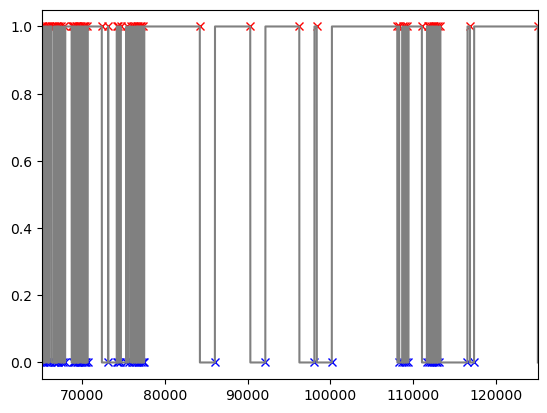

In [2862]:
### BACK find camera triggers: 

Camera_trig_states = back_camera['Trigger State'].values

where_ttl_changes = list(np.where(np.roll(Camera_trig_states,1)!=Camera_trig_states)[0])
if where_ttl_changes[0] == 0:
    where_ttl_changes = where_ttl_changes[1::]
Poke1_camera_inds = np.array(where_ttl_changes[1::2])
Trial_start_camera_inds= np.array(where_ttl_changes[0::2])

## check this is correct:
plt.plot(Poke1_camera_inds,np.ones(len(Poke1_camera_inds)),'x', color = 'red')
plt.plot(Trial_start_camera_inds,np.zeros(len(Trial_start_camera_inds)),'x',color = 'blue')
plt.plot(back_camera['Trigger State'].values, color = 'grey')
plt.xlim([max(where_ttl_changes)-60000, max(where_ttl_changes)])


print('blue x should be at uptick')
print('red should be a downtick') 



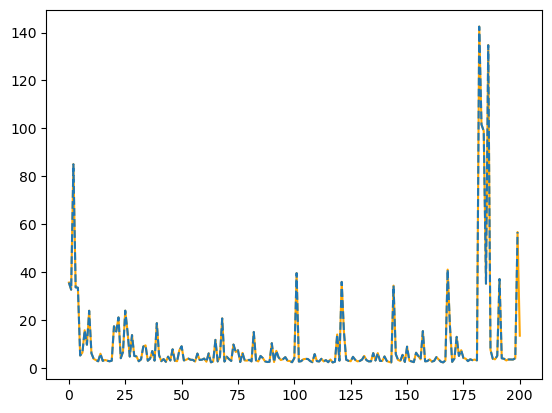

In [2864]:
plt.plot(np.diff(Trial_start_camera_inds/60), color = 'orange')
plt.plot(np.diff(Poke_data_EPhys.Trial_Start.unique()),'--')
# plt.xlim([260, 290])
# plt.xlim([0, 50])

In [2865]:
# Trial_start_camera_inds = Trial_start_camera_inds[0:51]

In [2866]:
### DONT RUN UNLESS THERE IS A BIG GAP ABOVE ## if there is an offset:

# # find max ind and use this to align
# cam_max_ind = np.argmax(np.diff(Trial_start_camera_inds/60))

# behav_max_ind = np.argmax(np.diff(Poke_data_EPhys.Trial_Start.unique()))

# offset = cam_max_ind - behav_max_ind


# plt.plot(np.diff(Trial_start_camera_inds/60)[offset:(1+offset+len(np.diff(Poke_data_EPhys.Trial_Start.unique())))])
# plt.plot(np.diff(Poke_data_EPhys.Trial_Start.unique()))

# Trial_start_camera_inds = Trial_start_camera_inds[offset:(2+offset+len(np.diff(Poke_data_EPhys.Trial_Start.unique())))]


(-0.5, 0.5)

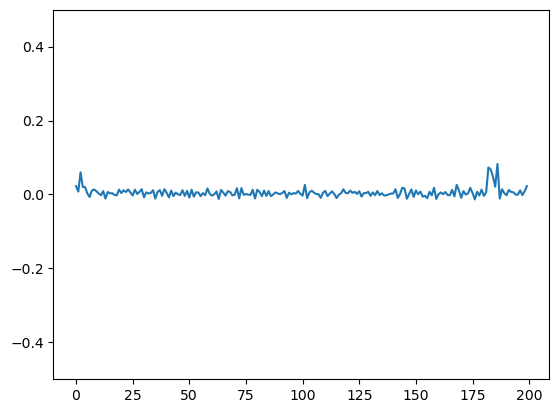

In [2867]:
plt.plot(np.diff(Trial_start_camera_inds/60)[0:-1] - np.diff(Poke_data_EPhys.Trial_Start.unique()))
# plt.plot(np.diff(Trial_start_camera_inds/60) - np.diff(Poke_data_EPhys.Trial_Start.unique()))
plt.ylim([-.5, 0.5])



In [2868]:
# perform fix: # puts a nan value where it detects ther is a missing trigger
trial_start_bpod_ts = Poke_data_EPhys.Trial_Start.unique()
fixed = test_timestamps_(trial_start_bpod_ts,Trial_start_camera_inds/60)

fixed_Trial_start_camera_inds = (fixed*60)[0:len(trial_start_bpod_ts)]

working
test passed!


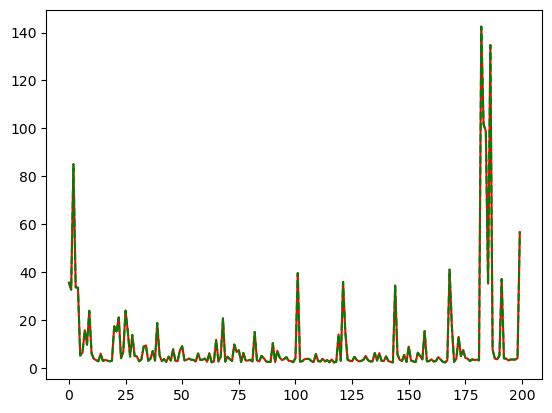

In [2869]:
### run tests on fixed data 

plt.plot(np.diff(fixed_Trial_start_camera_inds/60), color = 'red')
plt.plot(np.diff(Poke_data_EPhys.Trial_Start.unique()),'--', color = 'green')

(-0.5, 0.5)

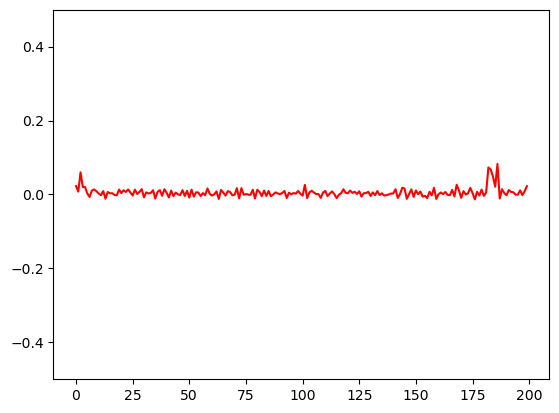

In [2870]:
plt.plot(np.diff(fixed_Trial_start_camera_inds/60) - np.diff(Poke_data_EPhys.Trial_Start.unique()), color = 'red')
plt.ylim([-.5, 0.5])

In [2871]:

print('start end diffs')
print('for ephys ts:      '+ str((fixed_Trial_start_camera_inds/60)[-1] - (fixed_Trial_start_camera_inds/60)[0]))
print('for behav ts:      ' + str(trial_start_bpod_ts[-1] -  trial_start_bpod_ts[0])) 

count = 0
for item in (np.diff(fixed_Trial_start_camera_inds/60) - np.diff(Poke_data_EPhys.Trial_Start.unique())):
    if not np.isnan(item):
        count = count + item 
print('ofset tot is:   ' + str(count))

Fixed_back_cam_tstart_ts = fixed_Trial_start_camera_inds

start end diffs
for ephys ts:      1918.2833333333333
for behav ts:      1917.2231
ofset tot is:   1.0602333333332794


# Side

blue x should be at uptick
red should be a downtick


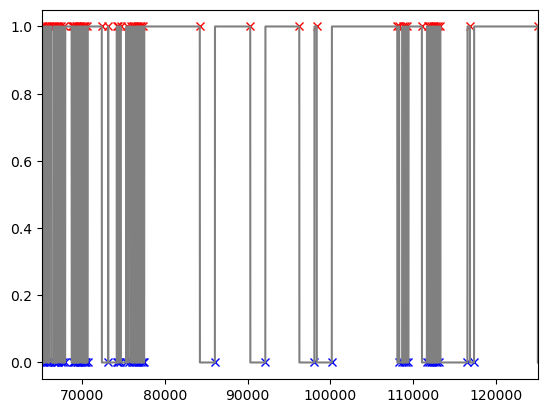

In [2872]:
## side find camera triggers: 

Camera_trig_states = side_camera['Trigger State'].values

where_ttl_changes = list(np.where(np.roll(Camera_trig_states,1)!=Camera_trig_states)[0])
if where_ttl_changes[0] == 0:
    where_ttl_changes = where_ttl_changes[1::]
Poke1_camera_inds = np.array(where_ttl_changes[1::2])
Trial_start_camera_inds= np.array(where_ttl_changes[0::2])

## check this is correct:
plt.plot(Poke1_camera_inds,np.ones(len(Poke1_camera_inds)),'x', color = 'red')
plt.plot(Trial_start_camera_inds,np.zeros(len(Trial_start_camera_inds)),'x',color = 'blue')
plt.plot(back_camera['Trigger State'].values, color = 'grey')
plt.xlim([max(where_ttl_changes)-60000, max(where_ttl_changes)])
print('blue x should be at uptick')
print('red should be a downtick') 



(0.0, 260.0)

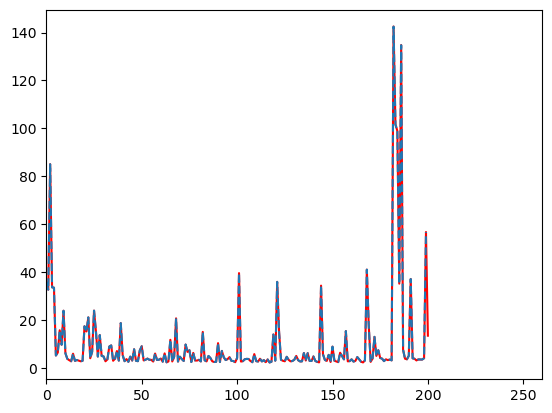

In [2873]:
plt.plot(np.diff(Trial_start_camera_inds/60), color = 'red')
plt.plot(np.diff(Poke_data_EPhys.Trial_Start.unique()),'--')
plt.xlim([0, 260])

In [2874]:
# Trial_start_camera_inds = Trial_start_camera_inds[0:51]

In [2875]:
### DONT RUN UNLESS THERE IS A BIG GAP ABOVE ## if there is an offset:

# cam_max_ind = np.argmax(np.diff(Trial_start_camera_inds/60))
# # cam_max_ind = np.argmax(np.diff(Trial_start_camera_inds/60)[50::]) + 50

# behav_max_ind = np.argmax(np.diff(Poke_data_EPhys.Trial_Start.unique()))

# offset = cam_max_ind - behav_max_ind

# plt.plot(np.diff(Trial_start_camera_inds/60)[offset:(1+offset+len(np.diff(Poke_data_EPhys.Trial_Start.unique())))])
# plt.plot(np.diff(Poke_data_EPhys.Trial_Start.unique()))

# Trial_start_camera_inds = Trial_start_camera_inds[offset:(2+offset+len(np.diff(Poke_data_EPhys.Trial_Start.unique())))]


(-0.5, 0.5)

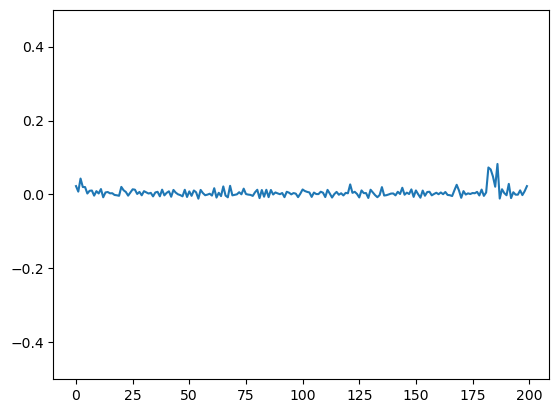

In [2876]:
# plt.plot(np.diff(Trial_start_camera_inds/60) - np.diff(Poke_data_EPhys.Trial_Start.unique())[0:-3])
plt.plot(np.diff(Trial_start_camera_inds/60)[0:-1] - np.diff(Poke_data_EPhys.Trial_Start.unique()))
plt.ylim([-.5, 0.5])


In [2877]:
# perform fix: # puts a nan value where it detects ther is a missing trigger
trial_start_bpod_ts = Poke_data_EPhys.Trial_Start.unique()
fixed = test_timestamps_(trial_start_bpod_ts,Trial_start_camera_inds/60)

fixed_Trial_start_camera_inds = (fixed*60)[0:len(trial_start_bpod_ts)]

working
test passed!


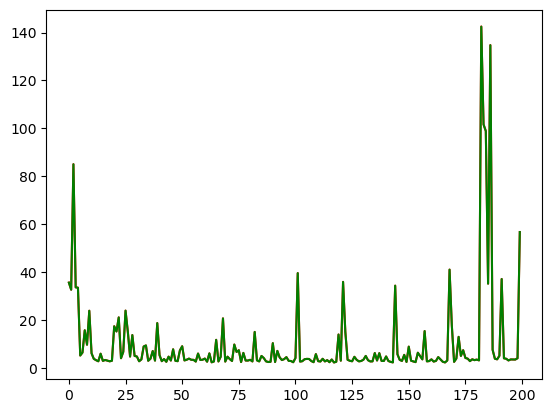

In [2878]:
### run tests on fixed data 

plt.plot(np.diff(fixed_Trial_start_camera_inds/60), color = 'red')
plt.plot(np.diff(Poke_data_EPhys.Trial_Start.unique()), color = 'green')

(-0.5, 0.5)

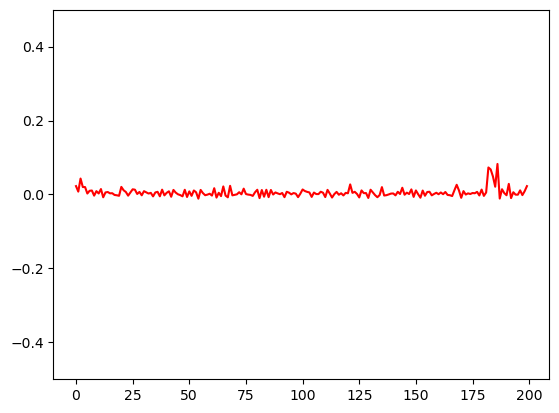

In [2879]:
plt.plot(np.diff(fixed_Trial_start_camera_inds/60) - np.diff(Poke_data_EPhys.Trial_Start.unique()), color = 'red')
plt.ylim([-.5, 0.5])

In [2880]:

print('start end diffs')
print('for ephys ts:      '+ str((fixed_Trial_start_camera_inds/60)[-1] - (fixed_Trial_start_camera_inds/60)[0]))
print('for behav ts:      ' + str(trial_start_bpod_ts[-1] -  trial_start_bpod_ts[0])) 

count = 0
for item in (np.diff(fixed_Trial_start_camera_inds/60) - np.diff(Poke_data_EPhys.Trial_Start.unique())):
    if not np.isnan(item):
        count = count + item 
print('ofset tot is:   ' + str(count))

Fixed_side_cam_tstart_ts = fixed_Trial_start_camera_inds


start end diffs
for ephys ts:      1918.3
for behav ts:      1917.2231
ofset tot is:   1.076899999999931


# bottom

In [1660]:
### bottom find camera triggers: 

Camera_trig_states = bottom_camera['Trigger State'].values

where_ttl_changes = list(np.where(np.roll(Camera_trig_states,1)!=Camera_trig_states)[0])
if where_ttl_changes[0] == 0:
    where_ttl_changes = where_ttl_changes[1::]
Poke1_camera_inds = np.array(where_ttl_changes[1::2])
Trial_start_camera_inds= np.array(where_ttl_changes[0::2])

## check this is correct:
plt.plot(Poke1_camera_inds,np.ones(len(Poke1_camera_inds)),'x', color = 'red')
plt.plot(Trial_start_camera_inds,np.zeros(len(Trial_start_camera_inds)),'x',color = 'blue')
plt.plot(back_camera['Trigger State'].values, color = 'grey')
plt.xlim([max(where_ttl_changes)-5000, max(where_ttl_changes)])
print('blue x should be at uptick')
print('red should be a downtick') 



NameError: name 'bottom_camera' is not defined

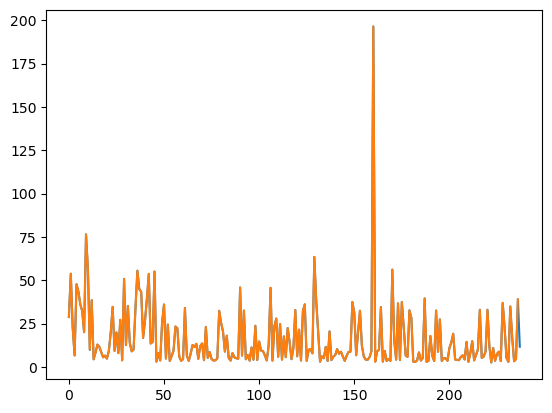

In [1661]:
plt.plot(np.diff(Trial_start_camera_inds/60))
plt.plot(np.diff(Poke_data_EPhys.Trial_Start.unique()))
# plt.xlim([242, 260])

(-0.5, 0.5)

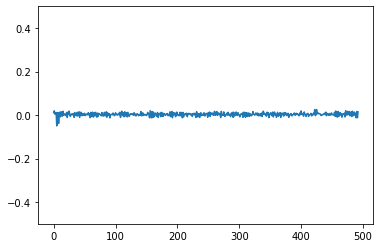

In [17]:
# plt.plot(np.diff(Trial_start_camera_inds/60) - np.diff(Poke_data_EPhys.Trial_Start.unique()))
plt.plot(np.diff(Trial_start_camera_inds/60)[0:-1] - np.diff(Poke_data_EPhys.Trial_Start.unique()))
plt.ylim([-.5, 0.5])


In [18]:
# perform fix: # puts a nan value where it detects ther is a missing trigger
trial_start_bpod_ts = Poke_data_EPhys.Trial_Start.unique()
fixed = test_timestamps_(trial_start_bpod_ts,Trial_start_camera_inds/60)

fixed_Trial_start_camera_inds = (fixed*60)[0:len(trial_start_bpod_ts)]

working
test passed!


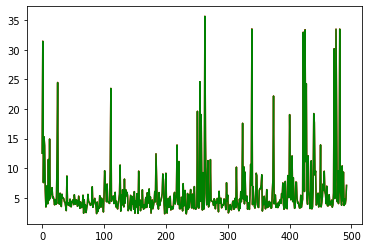

In [19]:
### run tests on fixed data 

plt.plot(np.diff(fixed_Trial_start_camera_inds/60), color = 'red')
plt.plot(np.diff(Poke_data_EPhys.Trial_Start.unique()), color = 'green')

(-0.5, 0.5)

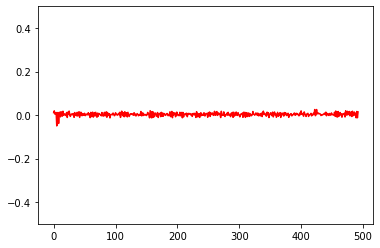

In [20]:
plt.plot(np.diff(fixed_Trial_start_camera_inds/60) - np.diff(Poke_data_EPhys.Trial_Start.unique()), color = 'red')
plt.ylim([-.5, 0.5])

In [21]:

print('start end diffs')
print('for ephys ts:      '+ str((fixed_Trial_start_camera_inds/60)[-1] - (fixed_Trial_start_camera_inds/60)[0]))
print('for behav ts:      ' + str(trial_start_bpod_ts[-1] -  trial_start_bpod_ts[0])) 

count = 0
for item in (np.diff(fixed_Trial_start_camera_inds/60) - np.diff(Poke_data_EPhys.Trial_Start.unique())):
    if not np.isnan(item):
        count = count + item 
print('ofset tot is:   ' + str(count))

Fixed_bottom_cam_tstart_ts = fixed_Trial_start_camera_inds


start end diffs
for ephys ts:      2895.916666666667
for behav ts:      2894.363
ofset tot is:   1.5536666666669205


In [2881]:
def align_to_start_ts(trials,fixed_cam_ts):
    Camera_timestamps = []
    Camera_time = []
    for trial in trials :
        Camera_timestamps.append(fixed_cam_ts[trial-1])
        Camera_time.append(fixed_cam_ts[trial-1]/60)
    return Camera_timestamps,Camera_time

## alignment: 
def align_allpokes_to_cam_trialstart(Trials,trial_start_bpod_ts,PokeIn_Time,Fixed_back_cam_tstart_ts):

    cam_poke_times = []
    for index,trial in enumerate(Trials):
        bpod_trial_start = trial_start_bpod_ts[trial-1]
        poke_time = PokeIn_Time[index]
        diff = poke_time - bpod_trial_start
        cam_poke_times = cam_poke_times + [(Fixed_back_cam_tstart_ts[trial-1]/60) + diff]

    return cam_poke_times

In [2882]:
### align fixed and checked timestamps:

# bottom_aligned_ts,bottom_aligned_time = align_to_start_ts(Poke_data_EPhys.Trial_id.values,Fixed_bottom_cam_tstart_ts)
side_aligned_ts,side_aligned_time = align_to_start_ts(Poke_data_EPhys.Trial_id.values,Fixed_side_cam_tstart_ts)
back_aligned_ts,back_aligned_time = align_to_start_ts(Poke_data_EPhys.Trial_id.values,Fixed_back_cam_tstart_ts)

# bottom_pokein_times = align_allpokes_to_cam_trialstart(Poke_data_EPhys.Trial_id.values, Poke_data_EPhys.Trial_Start.unique(), Poke_data_EPhys.PokeIn_Time.values,Fixed_bottom_cam_tstart_ts)
side_pokein_times = align_allpokes_to_cam_trialstart(Poke_data_EPhys.Trial_id.values, Poke_data_EPhys.Trial_Start.unique(), Poke_data_EPhys.PokeIn_Time.values,Fixed_side_cam_tstart_ts)
back_pokein_times = align_allpokes_to_cam_trialstart(Poke_data_EPhys.Trial_id.values, Poke_data_EPhys.Trial_Start.unique(), Poke_data_EPhys.PokeIn_Time.values,Fixed_back_cam_tstart_ts)

# bottom_pokeout_times = align_allpokes_to_cam_trialstart(Poke_data_EPhys.Trial_id.values, Poke_data_EPhys.Trial_Start.unique(), Poke_data_EPhys.PokeOut_Time.values,Fixed_bottom_cam_tstart_ts)
side_pokeout_times = align_allpokes_to_cam_trialstart(Poke_data_EPhys.Trial_id.values, Poke_data_EPhys.Trial_Start.unique(), Poke_data_EPhys.PokeOut_Time.values,Fixed_side_cam_tstart_ts)
back_pokeout_times = align_allpokes_to_cam_trialstart(Poke_data_EPhys.Trial_id.values, Poke_data_EPhys.Trial_Start.unique(), Poke_data_EPhys.PokeOut_Time.values,Fixed_back_cam_tstart_ts)


In [2883]:
Poke_data_EPhys

,Unnamed: 0.1,Unnamed: 0,Trial_id,Trial_Start,Port,PokeIn_Time,PokeOut_Time,Reward_Times,Trial_End,"Port 2,3,4,5 LED intensities",...,SIDE_Trial_End_Camera_Time,SIDE_First_poke_Camera_Time,BOTTOM_Trial_Start_Camera_Time,BOTTOM_Trial_End_Camera_Time,BOTTOM_First_poke_Camera_Time,TrainingLevel,TrialStart_EphysTime,FirstPoke_EphysTime,PokeIN_EphysTime,PokeOUT_EphysTime
0,0,0,1,16.8882,2,46.0860,46.2909,NaN,52.4485,"[0.0, 0.0, 0.0, 0.0]",...,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,50,3651.943468,3681.142262,3681.141268,3681.346168
1,1,1,1,16.8882,1,46.7445,46.8901,NaN,52.4485,"[0.0, 0.0, 0.0, 0.0]",...,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,50,3651.943468,NaN,3681.799768,3681.945368
2,2,2,1,16.8882,5,47.3962,47.6304,NaN,52.4485,"[0.0, 0.0, 0.0, 0.0]",...,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,50,3651.943468,NaN,3682.451468,3682.685668
3,3,3,1,16.8882,2,48.5066,48.7199,NaN,52.4485,"[0.0, 0.0, 0.0, 0.0]",...,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,50,3651.943468,NaN,3683.561868,3683.775168
4,4,4,1,16.8882,6,49.1343,49.3232,NaN,52.4485,"[0.0, 0.0, 0.0, 0.0]",...,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,50,3651.943468,NaN,3684.189568,3684.378468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528,1528,1528,201,1934.1113,1,1943.1462,1943.3355,NaN,1947.4807,"[0.0, 0.0, 0.0, 0.0]",...,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,50,5569.231804,NaN,5578.266704,5578.456004
1529,1529,1529,201,1934.1113,1,1943.5344,1943.6719,NaN,1947.4807,"[0.0, 0.0, 0.0, 0.0]",...,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,50,5569.231804,NaN,5578.654904,5578.792404
1530,1530,1530,201,1934.1113,6,1944.1280,1944.4002,NaN,1947.4807,"[0.0, 0.0, 0.0, 0.0]",...,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,50,5569.231804,NaN,5579.248504,5579.520704
1531,1531,1531,201,1934.1113,3,1944.8943,1945.0717,NaN,1947.4807,"[0.0, 0.0, 0.0, 0.0]",...,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,50,5569.231804,NaN,5580.014804,5580.192204


In [2884]:
# ### if no camera data:

# back_aligned_time =  ['Cameras Corrupted  no video data'] * len(Poke_data_EPhys.Trial_id.values)
# back_pokein_times = ['Cameras Corrupted  no video data'] * len(Poke_data_EPhys.Trial_id.values)
# back_pokeout_times = ['Cameras Corrupted  no video data'] * len(Poke_data_EPhys.Trial_id.values)
# back_aligned_ts = ['Cameras Corrupted  no video data'] * len(Poke_data_EPhys.Trial_id.values)

# side_aligned_time = ['Cameras Corrupted  no video data'] * len(Poke_data_EPhys.Trial_id.values)
# side_pokein_times = ['Cameras Corrupted  no video data'] * len(Poke_data_EPhys.Trial_id.values)
# side_pokeout_times = ['Cameras Corrupted  no video data'] * len(Poke_data_EPhys.Trial_id.values)
# side_aligned_ts = ['Cameras Corrupted  no video data'] * len(Poke_data_EPhys.Trial_id.values)
bottom_aligned_time = ['Cameras Corrupted  no video data'] * len(Poke_data_EPhys.Trial_id.values)
bottom_pokein_times = ['Cameras Corrupted  no video data'] * len(Poke_data_EPhys.Trial_id.values)
bottom_pokeout_times = ['Cameras Corrupted  no video data'] * len(Poke_data_EPhys.Trial_id.values)
bottom_aligned_ts = ['Cameras Corrupted  no video data'] * len(Poke_data_EPhys.Trial_id.values)

In [2885]:
### make a new dataframe:

new_PortIn_df = pd.DataFrame(
    {'Trial_id' : Poke_data_EPhys.Trial_id.values,
     'Trial_Start' : Poke_data_EPhys.Trial_Start.values,
     'Port': Poke_data_EPhys.Port.values,
     'PokeIn_Time': Poke_data_EPhys.PokeIn_Time.values,
     'PokeOut_Time': Poke_data_EPhys.PokeOut_Time.values,
     'Reward_Times': Poke_data_EPhys.Reward_Times.values,
     'Trial_End' : Poke_data_EPhys.Trial_End.values,
     'Port_2-3-4-5_LED_intensities': Poke_data_EPhys['Port 2,3,4,5 LED intensities'].values,
     'Port_1-2-3-4_RewardAmount': Poke_data_EPhys['Port 1,2,3,4 RewardAmount'].values,
     'TrainingLevel': Poke_data_EPhys.TrainingLevel.values,
     
     'TrialStart_EphysTime': Poke_data_EPhys.TrialStart_EphysTime.values,
     'FirstPoke_EphysTime': Poke_data_EPhys.FirstPoke_EphysTime.values,
     'PokeIN_EphysTime': Poke_data_EPhys.PokeIN_EphysTime.values,
     'PokeOUT_EphysTime': Poke_data_EPhys.PokeOUT_EphysTime.values,
    
     'backcam_trialstart_seconds':back_aligned_time,
     'backcam_aligned_pokein_times':back_pokein_times,
     'backcam_aligned_pokeout_times':back_pokeout_times,
     'backcam_trialstart_timestamps':back_aligned_ts,
     
     'sidecam_trialstart_seconds':side_aligned_time,
     'sidecam_aligned_pokein_times':side_pokein_times,
     'sidecam_aligned_pokeout_times':side_pokeout_times,
     'sidecam_trialstart_timestamps':side_aligned_ts,
     
     'bottomcam_trialstart_seconds':bottom_aligned_time,
     'bottomcam_aligned_pokein_times':bottom_pokein_times,
     'bottomcam_aligned_pokeout_times':bottom_pokeout_times,
     'bottomcam_trialstart_timestamps':bottom_aligned_ts,
 
    })

In [2886]:
new_PortIn_df

,Trial_id,Trial_Start,Port,PokeIn_Time,PokeOut_Time,Reward_Times,Trial_End,Port_2-3-4-5_LED_intensities,Port_1-2-3-4_RewardAmount,TrainingLevel,...,backcam_aligned_pokeout_times,backcam_trialstart_timestamps,sidecam_trialstart_seconds,sidecam_aligned_pokein_times,sidecam_aligned_pokeout_times,sidecam_trialstart_timestamps,bottomcam_trialstart_seconds,bottomcam_aligned_pokein_times,bottomcam_aligned_pokeout_times,bottomcam_trialstart_timestamps
0,1,16.8882,2,46.0860,46.2909,NaN,52.4485,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",50,...,53.902700,1470.0,24.5,53.6978,53.9027,1470.0,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data
1,1,16.8882,1,46.7445,46.8901,NaN,52.4485,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",50,...,54.501900,1470.0,24.5,54.3563,54.5019,1470.0,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data
2,1,16.8882,5,47.3962,47.6304,NaN,52.4485,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",50,...,55.242200,1470.0,24.5,55.0080,55.2422,1470.0,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data
3,1,16.8882,2,48.5066,48.7199,NaN,52.4485,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",50,...,56.331700,1470.0,24.5,56.1184,56.3317,1470.0,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data
4,1,16.8882,6,49.1343,49.3232,NaN,52.4485,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",50,...,56.935000,1470.0,24.5,56.7461,56.9350,1470.0,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528,201,1934.1113,1,1943.1462,1943.3355,NaN,1947.4807,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",50,...,1952.007533,116567.0,1942.8,1951.8349,1952.0242,116568.0,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data
1529,201,1934.1113,1,1943.5344,1943.6719,NaN,1947.4807,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",50,...,1952.343933,116567.0,1942.8,1952.2231,1952.3606,116568.0,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data
1530,201,1934.1113,6,1944.1280,1944.4002,NaN,1947.4807,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",50,...,1953.072233,116567.0,1942.8,1952.8167,1953.0889,116568.0,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data
1531,201,1934.1113,3,1944.8943,1945.0717,NaN,1947.4807,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",50,...,1953.743733,116567.0,1942.8,1953.5830,1953.7604,116568.0,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data


In [2887]:
##### Testing:

In [2888]:
file[11:12]

'4'

In [2889]:
out_path = r"Z:\projects\sequence_squad\organised_data\animals\\EJT268_implant1\recording1_05-01-2023\behav_sync\\2_task\\"

# save out new df?

In [2890]:
### chang ethis if needed (eg. clock or not 2_task issue )

out_path = r"Z:\projects\sequence_squad\organised_data\animals\\" +  animal + '_implant' + MIR.split('_')[1] + '\\'
for file in os.listdir(out_path):
    if 'recording' + Rnum in file:
        print(file)
#         file = 'recording1_05-01-2023'
        out_path = out_path + file 
#         break
out_path = out_path + r'\behav_sync\\2_task\\'
print(out_path)




recording1_04-14-2023
Z:\projects\sequence_squad\organised_data\animals\\EJT255_implant1\recording1_04-14-2023\behav_sync\\2_task\\


In [2891]:
new_PortIn_df.to_csv(out_path +'Behav_Ephys_Camera_Sync.csv')

print('data checked?')
print('data Saved')

data checked?
data Saved


# Run video clip tests: 

In [2892]:
port3_inds = [np.where(new_PortIn_df.Port.values == 3)[0][10], np.where(new_PortIn_df.Port.values == 3)[0][int(new_PortIn_df.Trial_id.values[-1]/2)], np.where(new_PortIn_df.Port.values == 3)[0][-5]]
port1_inds = [np.where(new_PortIn_df.Port.values == 1)[0][10], np.where(new_PortIn_df.Port.values == 1)[0][int(new_PortIn_df.Trial_id.values[-1]/2)], np.where(new_PortIn_df.Port.values == 1)[0][-10]]

In [2893]:
port3_inds

[77, 538, 1519]

In [2894]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
from moviepy.editor import *

In [2895]:
frame_time

2870.0420333333336

In [2896]:
## back

cam_path = back_camera.DataPath.values[0][0:-3] + 'avi'

for ind in port1_inds:
    frame_time = back_pokein_times[ind]
    ffmpeg_extract_subclip(cam_path,frame_time - 1,frame_time,targetname=('D:\camera_test\\' +'port1_'+str(ind) + '_back_test.mp4'))
    
for ind in port3_inds:
    frame_time = back_pokein_times[ind]
    ffmpeg_extract_subclip(cam_path,frame_time-1,frame_time,targetname=('D:\camera_test\\' +'port3_'+str(ind) + '_back_test.mp4'))

    

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


In [2897]:
## side

cam_path = side_camera.DataPath.values[0][0:-3] + 'avi'

for ind in port1_inds:
    frame_time = side_pokein_times[ind]
    ffmpeg_extract_subclip(cam_path,frame_time - 1,frame_time,targetname=('D:\camera_test\\' +'port1_'+str(ind) + '_side_test.mp4'))
    
for ind in port3_inds:
    frame_time = side_pokein_times[ind]
    ffmpeg_extract_subclip(cam_path,frame_time-1,frame_time,targetname=('D:\camera_test\\' +'port3_'+str(ind) + '_side_test.mp4'))


Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


In [2898]:
### Manipulate this into a transition dataframe and save this out also. 

In [2899]:
def Determine_Transition_Times_and_Types(All_PortIn_Times_sorted ,All_PortOut_Times_sorted, All_Port_references_sorted):
    out_in= []
    in_in = []
    transition_type = []
    out_in_transition_reference = []
    in_in_transition_reference = []
    for index,port in enumerate(All_Port_references_sorted):
        if index > 0:
            out_in = out_in + [All_PortIn_Times_sorted[index] - All_PortOut_Times_sorted[index-1] ]
            out_in_transition_reference = out_in_transition_reference + [All_PortOut_Times_sorted[index-1]]

            in_in = in_in + [All_PortIn_Times_sorted[index] - All_PortIn_Times_sorted[index-1] ]
            in_in_transition_reference = in_in_transition_reference + [All_PortIn_Times_sorted[index-1]]

            transition_type = transition_type + [int(str(All_Port_references_sorted[index-1]) + str(port))]

    return (np.array(out_in),np.array(in_in) ,np.array(transition_type),out_in_transition_reference,in_in_transition_reference)


def Start_End_port_id(Transition_types,start_end_arg):
    output = []
    for item in Transition_types:
        String = str(item)
        output = output + [int(String[start_end_arg])]
    return output

def determine_RepeatPort_events(start_port_ids,end_port_ids):
    Port_repeat = []
    for index, item in enumerate(start_port_ids):
        if item == end_port_ids[index]:
            Port_repeat = Port_repeat + [0]
        else: 
            Port_repeat = Port_repeat + [1]
    return Port_repeat    

def filter_transitons_by_latency(Transition_times, Upper_Filter):
    Filtered_transitions = []
    for item in Transition_times:
        if item < Upper_Filter:
            Filtered_transitions = Filtered_transitions + [1]
        else:
            Filtered_transitions = Filtered_transitions + [0]
    return Filtered_transitions

In [2900]:
Port_intimes = Poke_data_EPhys.PokeIn_Time.values
Port_outtimes = Poke_data_EPhys.PokeOut_Time.values
Ports = Poke_data_EPhys.Port.values

#Determine Transition times and types for all events 
out_in_Transition_times, in_in_Transition_times, Transition_types, out_in_transition_reference,in_in_transition_reference = Determine_Transition_Times_and_Types(Port_intimes,Port_outtimes,Ports)

#Split transtion types into first and last ports: 
start_port_ids = Start_End_port_id(Transition_types,0)
end_port_ids = Start_End_port_id(Transition_types,1)

#Align start and end port time
End_Port_in_time = Port_intimes[1::]
Start_Port_in_time = Port_intimes[0:-1]
End_Port_out_time = Port_outtimes[1::]
Start_Port_out_time = Port_outtimes[0:-1]

#Find Port repeat events (double pokes)
Non_Port_repeat = determine_RepeatPort_events(start_port_ids,end_port_ids)

#Determine which transitions are good: less than 1.5s
out_in_Filtered_transitions = filter_transitons_by_latency(out_in_Transition_times, 2)
in_in_Filtered_transitions = filter_transitons_by_latency(in_in_Transition_times, 2)

In [2901]:
# make dataframe:
new_Transition_df = pd.DataFrame(
    {'Trial_id' : Poke_data_EPhys['Trial_id'][0:-1],
    'Transition_type' : Transition_types,
     'Start_Port':start_port_ids, 
     'End_Port':end_port_ids,
     'Start_Poke_in_time': Start_Port_in_time,
     'Start_Poke_out_time': Start_Port_out_time,
     'End_Poke_in_time': End_Port_in_time,
     'End_Poke_out_time': End_Port_out_time,
     'out_in_Latency' : out_in_Transition_times,
     'in_in_Latency': in_in_Transition_times,
     '2s_Time_Filter_out_in': out_in_Filtered_transitions,
     '2s_Time_Filter_in_in': in_in_Filtered_transitions,
     'Port_2-3-4-5_LED_intensities': Poke_data_EPhys['Port 2,3,4,5 LED intensities'].values[0:-1],
     'Port_1-2-3-4_RewardAmount': Poke_data_EPhys['Port 1,2,3,4 RewardAmount'].values[0:-1],
     'Repeat_Filter':Non_Port_repeat,
     
     'TrialStart_EphysTime': Poke_data_EPhys.TrialStart_EphysTime.values[0:-1],
     'FirstPoke_EphysTime': Poke_data_EPhys.FirstPoke_EphysTime.values[0:-1],
     'P1_IN_Ephys_TS': Poke_data_EPhys.PokeIN_EphysTime.values[0:-1],
     'P1_OUT_Ephys_TS': Poke_data_EPhys.PokeOUT_EphysTime.values[0:-1],
     'P2_IN_Ephys_TS': Poke_data_EPhys.PokeIN_EphysTime.values[1::],
     'P2_OUT_Ephys_TS': Poke_data_EPhys.PokeOUT_EphysTime.values[1::],
     
     'backcam_trialstart_seconds':back_aligned_time[0:-1],
     'backcam_trialstart_timestamps':back_aligned_ts[0:-1],  
     'backcam_aligned_P1In_times':back_pokein_times[0:-1],
     'backcam_aligned_P1Out_times':back_pokeout_times[0:-1],
     'backcam_aligned_P2In_times':back_pokein_times[1::],
     'backcam_aligned_P2Out_times':back_pokeout_times[1::],
     
     'sidecam_trialstart_seconds':side_aligned_time[0:-1],
     'sidecam_trialstart_timestamps':side_aligned_ts[0:-1],  
     'sidecam_aligned_P1In_times':side_pokein_times[0:-1],
     'sidecam_aligned_P1Out_times':side_pokeout_times[0:-1],
     'sidecam_aligned_P2In_times':side_pokein_times[1::],
     'sidecam_aligned_P2Out_times':side_pokeout_times[1::],
     
     'bottomcam_trialstart_seconds':bottom_aligned_time[0:-1],
     'bottomcam_trialstart_timestamps':bottom_aligned_ts[0:-1],  
     'bottomcam_aligned_P1In_times':bottom_pokein_times[0:-1],
     'bottomcam_aligned_P1Out_times':bottom_pokeout_times[0:-1],
     'bottomcam_aligned_P2In_times':bottom_pokein_times[1::],
     'bottomcam_aligned_P2Out_times':bottom_pokeout_times[1::]
    
    })
     


In [2902]:
new_Transition_df.to_csv(out_path +'Transition_data_sync.csv')

print('data checked?')
print('data Saved')

data checked?
data Saved


In [2903]:
new_Transition_df

,Trial_id,Transition_type,Start_Port,End_Port,Start_Poke_in_time,Start_Poke_out_time,End_Poke_in_time,End_Poke_out_time,out_in_Latency,in_in_Latency,...,sidecam_aligned_P1In_times,sidecam_aligned_P1Out_times,sidecam_aligned_P2In_times,sidecam_aligned_P2Out_times,bottomcam_trialstart_seconds,bottomcam_trialstart_timestamps,bottomcam_aligned_P1In_times,bottomcam_aligned_P1Out_times,bottomcam_aligned_P2In_times,bottomcam_aligned_P2Out_times
0,1,21,2,1,46.0860,46.2909,46.7445,46.8901,0.4536,0.6585,...,53.6978,53.9027,54.3563,54.5019,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data
1,1,15,1,5,46.7445,46.8901,47.3962,47.6304,0.5061,0.6517,...,54.3563,54.5019,55.0080,55.2422,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data
2,1,52,5,2,47.3962,47.6304,48.5066,48.7199,0.8762,1.1104,...,55.0080,55.2422,56.1184,56.3317,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data
3,1,26,2,6,48.5066,48.7199,49.1343,49.3232,0.4144,0.6277,...,56.1184,56.3317,56.7461,56.9350,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data
4,1,63,6,3,49.1343,49.3232,49.9232,50.0859,0.6000,0.7889,...,56.7461,56.9350,57.5350,57.6977,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,201,71,7,1,1941.3166,1941.8235,1943.1462,1943.3355,1.3227,1.8296,...,1950.0053,1950.5122,1951.8349,1952.0242,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data
1528,201,11,1,1,1943.1462,1943.3355,1943.5344,1943.6719,0.1989,0.3882,...,1951.8349,1952.0242,1952.2231,1952.3606,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data
1529,201,16,1,6,1943.5344,1943.6719,1944.1280,1944.4002,0.4561,0.5936,...,1952.2231,1952.3606,1952.8167,1953.0889,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data
1530,201,63,6,3,1944.1280,1944.4002,1944.8943,1945.0717,0.4941,0.7663,...,1952.8167,1953.0889,1953.5830,1953.7604,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data


In [435]:
spikes_input_path = r"Z:\projects\sequence_squad\data\kilosort_output\\"
animal = MIR.split('_')[0]
Rnum = MIR.split('_')[-1]
spikes_input_path = spikes_input_path + animal +'\Recording' + Rnum + '\Processed_data\\'
print(spikes_input_path)

camera_ts_path = r"Z:\projects\sequence_squad\data\processed_bpod_data\\"
camera_ts_path= camera_ts_path + animal + '\Preprocessed\\'
for dir_ in os.listdir(camera_ts_path):
    if int(dir_[0:2]) == int(Rnum)-1:
        camera_ts_path = camera_ts_path + dir_ +'\\'
print(camera_ts_path)

Z:\projects\sequence_squad\data\kilosort_output\\EJT269\Recording7\Processed_data\
Z:\projects\sequence_squad\data\processed_bpod_data\\EJT269\Preprocessed\06_20230523_132615_Tue\


In [629]:
new_Transition_df

,Trial_id,Transition_type,Start_Port,End_Port,Start_Poke_in_time,Start_Poke_out_time,End_Poke_in_time,End_Poke_out_time,out_in_Latency,in_in_Latency,2s_Time_Filter_out_in,2s_Time_Filter_in_in,Port_2-3-4-5_LED_intensities,Port_1-2-3-4_RewardAmount,Repeat_Filter,TrialStart_EphysTime,FirstPoke_EphysTime,PokeIN_EphysTime,PokeOUT_EphysTime
0,1,22,2,2,63.3010,63.5779,83.4867,83.4940,19.9088,20.1857,0,0,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",0,5109.194649,5154.552326,5154.550849,5154.827749
1,1,22,2,2,83.4867,83.4940,114.7192,114.7245,31.2252,31.2325,0,0,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",0,5109.194649,NaN,5174.736549,5174.743849
2,2,22,2,2,114.7192,114.7245,115.8931,115.9250,1.1686,1.1739,1,1,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",0,5186.554024,5205.972136,5205.971524,5205.976824
3,2,27,2,7,115.8931,115.9250,115.9852,119.0984,0.0602,0.0921,1,1,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",1,5186.554024,NaN,5207.145424,5207.177324
4,2,71,7,1,115.9852,119.0984,152.9287,153.0252,33.8303,36.9435,0,0,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",1,5186.554024,NaN,5207.237524,5210.350724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2624,321,22,2,2,2607.0611,2607.0666,2607.0689,2607.3738,0.0023,0.0078,1,1,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",0,7696.425015,NaN,7698.396315,7698.401815
2625,321,21,2,1,2607.0689,2607.3738,2607.2129,2607.3479,-0.1609,0.1440,1,1,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",1,7696.425015,NaN,7698.404115,7698.709015
2626,321,16,1,6,2607.2129,2607.3479,2607.9030,2608.0022,0.5551,0.6901,1,1,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",1,7696.425015,NaN,7698.548115,7698.683115
2627,321,63,6,3,2607.9030,2608.0022,2608.4547,2608.7321,0.4525,0.5517,1,1,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",1,7696.425015,NaN,7699.238215,7699.337415


# CLOCK TASK

In [2468]:

camera_ts_path = camera_ts_path + '//CLOCK//'

### import camera data 

filename = 'ClockPokeData_camera_ephys_aligned.csv'
Poke_data_EPhys = pd.read_csv(spikes_input_path + filename)

for file in os.listdir(camera_ts_path):
    if 'back' in file:
        print(file)
        back_camera = pd.read_csv(camera_ts_path + file)
    if 'bottom' in file:
        print(file)
        bottom_camera = pd.read_csv(camera_ts_path + file)        
    if 'side' in file: 
        print(file)
        side_camera = pd.read_csv(camera_ts_path + file)        
    if 'above' in file:
        print('ABOVE file!!!')


back_2023-05-24T16_11_38-camera-timestamp-data.csv
side_2023-05-24T16_11_39-camera-timestamp-data.csv


In [2469]:
Poke_data_EPhys

,Unnamed: 0.1,Unnamed: 0,Trial_id,Trial_sequence,Trial_Start,Port,PokeIn_Time,PokeOut_Time,Reward_Times,Trial_End,BACK_Trial_Start_Camera_Time,BACK_Trial_End_Camera_Time,BACK_First_poke_Camera_Time,SIDE_Trial_Start_Camera_Time,SIDE_Trial_End_Camera_Time,SIDE_First_poke_Camera_Time,TrialStart_EphysTime,FirstPoke_EphysTime,PokeIN_EphysTime,PokeOUT_EphysTime
0,0,0,1,"[1, 5]",11.9939,3,14.7719,15.0600,NaN,22.4909,70.450000,80.947000,NaN,70.449625,80.946625,NaN,16792.916601,NaN,16795.694601,16795.982701
1,1,1,1,"[1, 5]",11.9939,2,15.3049,15.4724,NaN,22.4909,70.450000,80.947000,NaN,70.449625,80.946625,NaN,16792.916601,NaN,16796.227601,16796.395101
2,2,2,1,"[1, 5]",11.9939,1,15.6968,15.7166,NaN,22.4909,70.450000,80.947000,74.165000,70.449625,80.946625,74.147875,16792.916601,16796.619646,16796.619501,16796.639301
3,3,3,1,"[1, 5]",11.9939,1,15.7495,18.3988,NaN,22.4909,70.450000,80.947000,NaN,70.449625,80.946625,NaN,16792.916601,NaN,16796.672201,16799.321501
4,4,4,1,"[1, 5]",11.9939,6,18.7612,19.0241,NaN,22.4909,70.450000,80.947000,NaN,70.449625,80.946625,NaN,16792.916601,NaN,16799.683901,16799.946801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,3215,3215,745,"[2, 6]",5932.9175,3,5936.4693,5936.5922,NaN,5939.0223,5991.918625,5998.023425,NaN,5991.904125,5998.008925,NaN,22714.056384,NaN,22717.608184,22717.731084
3216,3216,3216,745,"[2, 6]",5932.9175,2,5937.4992,5937.5281,NaN,5939.0223,5991.918625,5998.023425,5996.499875,5991.904125,5998.008925,5996.485250,22714.056384,22718.638178,22718.638084,22718.666984
3217,3217,3217,745,"[2, 6]",5932.9175,2,5937.5346,5938.2684,NaN,5939.0223,5991.918625,5998.023425,NaN,5991.904125,5998.008925,NaN,22714.056384,NaN,22718.673484,22719.407284
3218,3218,3218,745,"[2, 6]",5932.9175,6,5938.6123,5938.8689,5938.6123,5939.0223,5991.918625,5998.023425,NaN,5991.904125,5998.008925,NaN,22714.056384,NaN,22719.751184,22720.007784


In [2099]:
318

318

In [1033]:
len(Poke1_camera_inds)

463

In [1034]:
# how do the cams work for the clock task 

# Back camera

blue x should be at uptick
red should be a downtick


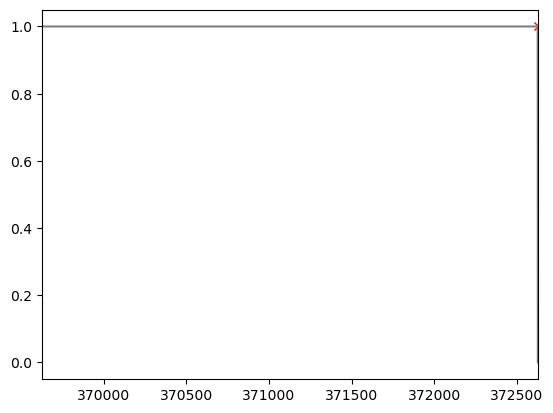

In [2470]:
### BACK find camera triggers: 

Camera_trig_states = back_camera['Trigger State'].values

where_ttl_changes = list(np.where(np.roll(Camera_trig_states,1)!=Camera_trig_states)[0])
if where_ttl_changes[0] == 0:
    where_ttl_changes = where_ttl_changes[1::]
Poke1_camera_inds = np.array(where_ttl_changes[1::2])
Trial_start_camera_inds= np.array(where_ttl_changes[0::2])

## check this is correct:
plt.plot(Poke1_camera_inds,np.ones(len(Poke1_camera_inds)),'x', color = 'red')
plt.plot(Trial_start_camera_inds,np.zeros(len(Trial_start_camera_inds)),'x',color = 'blue')
plt.plot(back_camera['Trigger State'].values, color = 'grey')

plt.xlim([max(where_ttl_changes)-3000, max(where_ttl_changes)])


print('blue x should be at uptick')
print('red should be a downtick') 



(0.0, 10.0)

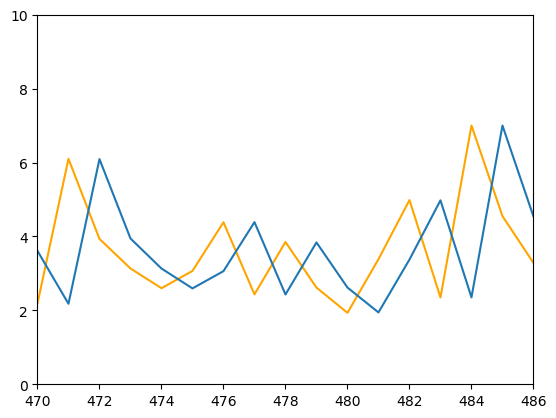

In [2475]:
plt.plot(np.diff(Trial_start_camera_inds/60), color = 'orange')
plt.plot(np.diff(Poke_data_EPhys.Trial_Start.unique()))

plt.xlim([470,486])
plt.ylim([0, 10])

In [2472]:
# plt.plot(np.diff(Trial_start_camera_inds/60) - np.diff(Poke_data_EPhys.Trial_Start.unique()))
plt.plot(np.diff(Trial_start_camera_inds/60)[0:-1] - np.diff(Poke_data_EPhys.Trial_Start.unique()))
plt.ylim([-.5, 0.5])



ValueError: operands could not be broadcast together with shapes (744,) (745,) 

In [2476]:
# perform fix: # puts a nan value where it detects ther is a missing trigger
trial_start_bpod_ts = Poke_data_EPhys.Trial_Start.unique()
fixed = test_timestamps_(trial_start_bpod_ts,Trial_start_camera_inds/60)

fixed_Trial_start_camera_inds = (fixed*60)[0:len(trial_start_bpod_ts)]

broken - being fixed
385
fixed
all fixed
working
test passed!


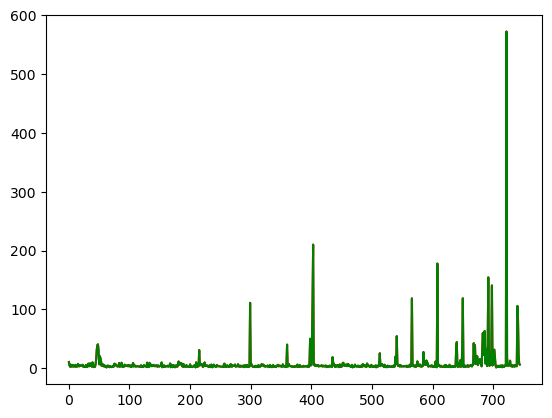

In [2477]:
### run tests on fixed data 

plt.plot(np.diff(fixed_Trial_start_camera_inds/60), color = 'red')
plt.plot(np.diff(Poke_data_EPhys.Trial_Start.unique()), color = 'green')

(-0.5, 0.5)

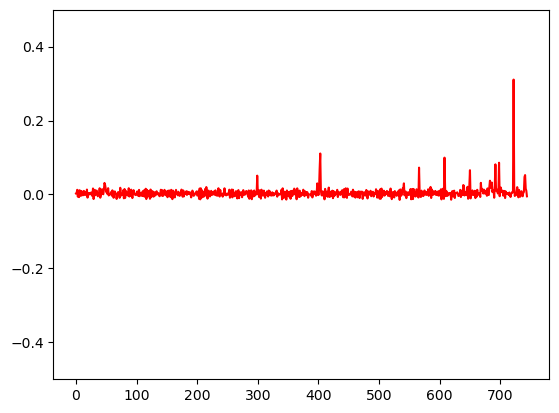

In [2478]:
plt.plot(np.diff(fixed_Trial_start_camera_inds/60) - np.diff(Poke_data_EPhys.Trial_Start.unique()), color = 'red')
plt.ylim([-.5, 0.5])

In [2479]:

print('start end diffs')
print('for ephys ts:      '+ str((fixed_Trial_start_camera_inds/60)[-1] - (fixed_Trial_start_camera_inds/60)[0]))
print('for behav ts:      ' + str(trial_start_bpod_ts[-1] -  trial_start_bpod_ts[0])) 

count = 0
for item in (np.diff(fixed_Trial_start_camera_inds/60) - np.diff(Poke_data_EPhys.Trial_Start.unique())):
    if not np.isnan(item):
        count = count + item 
print('ofset tot is:   ' + str(count))

Fixed_back_cam_tstart_ts = fixed_Trial_start_camera_inds

start end diffs
for ephys ts:      5930.366666666667
for behav ts:      5927.0286
ofset tot is:   3.3283333333336778


# bottom

In [820]:
### bottom find camera triggers: 

Camera_trig_states = bottom_camera['Trigger State'].values

where_ttl_changes = list(np.where(np.roll(Camera_trig_states,1)!=Camera_trig_states)[0])
if where_ttl_changes[0] == 0:
    where_ttl_changes = where_ttl_changes[1::]
Poke1_camera_inds = np.array(where_ttl_changes[1::2])
Trial_start_camera_inds= np.array(where_ttl_changes[0::2])

## check this is correct:
plt.plot(Poke1_camera_inds,np.ones(len(Poke1_camera_inds)),'x', color = 'red')
plt.plot(Trial_start_camera_inds,np.zeros(len(Trial_start_camera_inds)),'x',color = 'blue')
plt.plot(back_camera['Trigger State'].values, color = 'grey')

plt.xlim([max(where_ttl_changes)-50000, max(where_ttl_changes)])
print('blue x should be at uptick')
print('red should be a downtick') 



NameError: name 'bottom_camera' is not defined

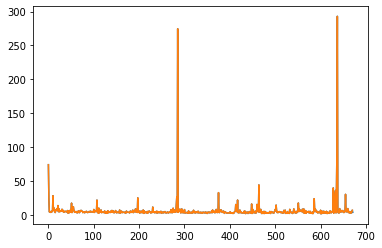

In [1488]:
plt.plot(np.diff(Trial_start_camera_inds/60))
plt.plot(np.diff(Poke_data_EPhys.Trial_Start.unique()))
# plt.xlim([242, 260])

(-0.5, 0.5)

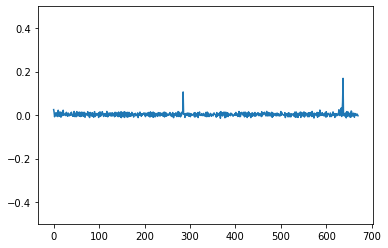

In [1489]:
# plt.plot(np.diff(Trial_start_camera_inds/60) - np.diff(Poke_data_EPhys.Trial_Start.unique()))
plt.plot(np.diff(Trial_start_camera_inds/60)[0:-1] - np.diff(Poke_data_EPhys.Trial_Start.unique()))
plt.ylim([-.5, 0.5])


In [1490]:
# perform fix: # puts a nan value where it detects ther is a missing trigger
trial_start_bpod_ts = Poke_data_EPhys.Trial_Start.unique()
fixed = test_timestamps_(trial_start_bpod_ts,Trial_start_camera_inds/60)

fixed_Trial_start_camera_inds = (fixed*60)[0:len(trial_start_bpod_ts)]

working
test passed!


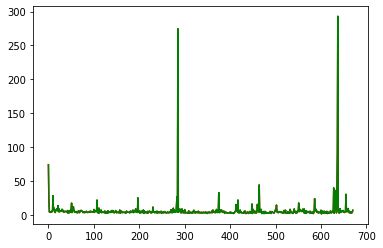

In [1491]:
### run tests on fixed data 

plt.plot(np.diff(fixed_Trial_start_camera_inds/60), color = 'red')
plt.plot(np.diff(Poke_data_EPhys.Trial_Start.unique()), color = 'green')

(-0.5, 0.5)

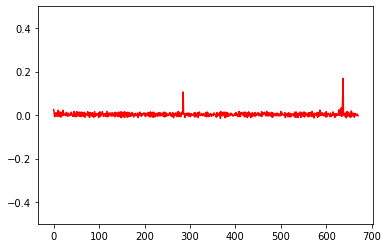

In [1492]:
plt.plot(np.diff(fixed_Trial_start_camera_inds/60) - np.diff(Poke_data_EPhys.Trial_Start.unique()), color = 'red')
plt.ylim([-.5, 0.5])

In [1493]:

print('start end diffs')
print('for ephys ts:      '+ str((fixed_Trial_start_camera_inds/60)[-1] - (fixed_Trial_start_camera_inds/60)[0]))
print('for behav ts:      ' + str(trial_start_bpod_ts[-1] -  trial_start_bpod_ts[0])) 

count = 0
for item in (np.diff(fixed_Trial_start_camera_inds/60) - np.diff(Poke_data_EPhys.Trial_Start.unique())):
    if not np.isnan(item):
        count = count + item 
print('ofset tot is:   ' + str(count))

Fixed_bottom_cam_tstart_ts = fixed_Trial_start_camera_inds


start end diffs
for ephys ts:      3960.6833333333334
for behav ts:      3958.5329
ofset tot is:   2.150433333333382


# Side

blue x should be at uptick
red should be a downtick


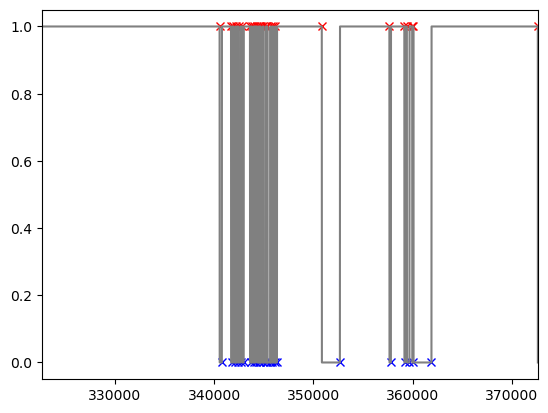

In [2491]:
## side find camera triggers: 

Camera_trig_states = side_camera['Trigger State'].values

where_ttl_changes = list(np.where(np.roll(Camera_trig_states,1)!=Camera_trig_states)[0])
if where_ttl_changes[0] == 0:
    where_ttl_changes = where_ttl_changes[1::]
Poke1_camera_inds = np.array(where_ttl_changes[1::2])
Trial_start_camera_inds= np.array(where_ttl_changes[0::2])

## check this is correct:
plt.plot(Poke1_camera_inds,np.ones(len(Poke1_camera_inds)),'x', color = 'red')
plt.plot(Trial_start_camera_inds,np.zeros(len(Trial_start_camera_inds)),'x',color = 'blue')
plt.plot(back_camera['Trigger State'].values, color = 'grey')

plt.xlim([max(where_ttl_changes)-50000, max(where_ttl_changes)])

print('blue x should be at uptick')
print('red should be a downtick') 



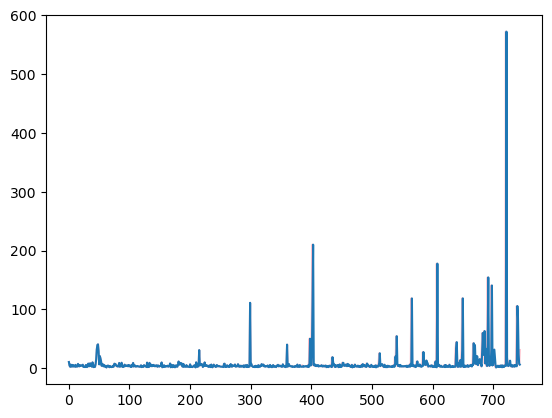

In [2492]:
plt.plot(np.diff(Trial_start_camera_inds/60), color = 'pink')
plt.plot(np.diff(Poke_data_EPhys.Trial_Start.unique()))
# plt.xlim([470,486])
# plt.ylim([0, 10])

In [2493]:
# plt.plot(np.diff(Trial_start_camera_inds/60) - np.diff(Poke_data_EPhys.Trial_Start.unique()))
plt.plot(np.diff(Trial_start_camera_inds/60)[0:-1] - np.diff(Poke_data_EPhys.Trial_Start.unique()))
plt.ylim([-.5, 0.5])


ValueError: operands could not be broadcast together with shapes (744,) (745,) 

In [2494]:
# perform fix: # puts a nan value where it detects ther is a missing trigger
trial_start_bpod_ts = Poke_data_EPhys.Trial_Start.unique()
fixed = test_timestamps_(trial_start_bpod_ts,Trial_start_camera_inds/60)

fixed_Trial_start_camera_inds = (fixed*60)[0:len(trial_start_bpod_ts)]

broken - being fixed
385
fixed
all fixed
working
test passed!


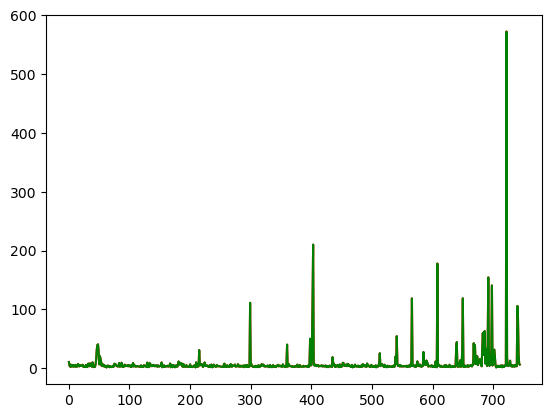

In [2495]:
### run tests on fixed data 

plt.plot(np.diff(fixed_Trial_start_camera_inds/60), color = 'red')
plt.plot(np.diff(Poke_data_EPhys.Trial_Start.unique()), color = 'green')
# plt.xlim([470,486])
# plt.ylim([0, 10])

(-0.5, 0.5)

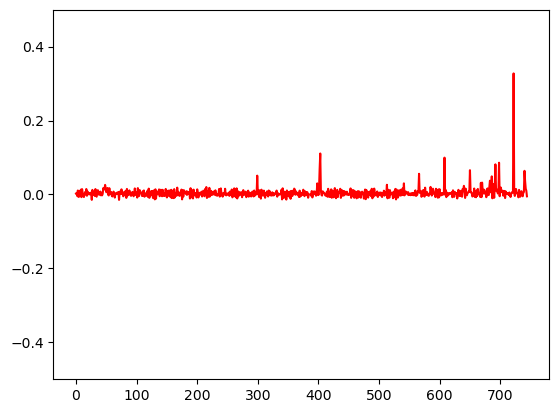

In [2496]:
plt.plot(np.diff(fixed_Trial_start_camera_inds/60) - np.diff(Poke_data_EPhys.Trial_Start.unique()), color = 'red')
plt.ylim([-.5, 0.5])

In [2497]:

print('start end diffs')
print('for ephys ts:      '+ str((fixed_Trial_start_camera_inds/60)[-1] - (fixed_Trial_start_camera_inds/60)[0]))
print('for behav ts:      ' + str(trial_start_bpod_ts[-1] -  trial_start_bpod_ts[0])) 

count = 0
for item in (np.diff(fixed_Trial_start_camera_inds/60) - np.diff(Poke_data_EPhys.Trial_Start.unique())):
    if not np.isnan(item):
        count = count + item 
print('ofset tot is:   ' + str(count))

Fixed_side_cam_tstart_ts = fixed_Trial_start_camera_inds


start end diffs
for ephys ts:      5930.383333333333
for behav ts:      5927.0286
ofset tot is:   3.345000000000102


In [2498]:
def align_to_start_ts(trials,fixed_cam_ts):
    Camera_timestamps = []
    Camera_time = []
    for trial in trials :
        Camera_timestamps.append(fixed_cam_ts[trial-1])
        Camera_time.append(fixed_cam_ts[trial-1]/60)
    return Camera_timestamps,Camera_time

## alignment: 
def align_allpokes_to_cam_trialstart(Trials,trial_start_bpod_ts,PokeIn_Time,Fixed_back_cam_tstart_ts):

    cam_poke_times = []
    for index,trial in enumerate(Trials):
        bpod_trial_start = trial_start_bpod_ts[trial-1]
        poke_time = PokeIn_Time[index]
        diff = poke_time - bpod_trial_start
        cam_poke_times = cam_poke_times + [(Fixed_back_cam_tstart_ts[trial-1]/60) + diff]

    return cam_poke_times

In [2499]:
### align fixed and checked timestamps:

# bottom_aligned_ts,bottom_aligned_time = align_to_start_ts(Poke_data_EPhys.Trial_id.values,Fixed_bottom_cam_tstart_ts)
side_aligned_ts,side_aligned_time = align_to_start_ts(Poke_data_EPhys.Trial_id.values,Fixed_side_cam_tstart_ts)
back_aligned_ts,back_aligned_time = align_to_start_ts(Poke_data_EPhys.Trial_id.values,Fixed_back_cam_tstart_ts)

# bottom_pokein_times = align_allpokes_to_cam_trialstart(Poke_data_EPhys.Trial_id.values, Poke_data_EPhys.Trial_Start.unique(), Poke_data_EPhys.PokeIn_Time.values,Fixed_bottom_cam_tstart_ts)
side_pokein_times = align_allpokes_to_cam_trialstart(Poke_data_EPhys.Trial_id.values, Poke_data_EPhys.Trial_Start.unique(), Poke_data_EPhys.PokeIn_Time.values,Fixed_side_cam_tstart_ts)
back_pokein_times = align_allpokes_to_cam_trialstart(Poke_data_EPhys.Trial_id.values, Poke_data_EPhys.Trial_Start.unique(), Poke_data_EPhys.PokeIn_Time.values,Fixed_back_cam_tstart_ts)

# bottom_pokeout_times = align_allpokes_to_cam_trialstart(Poke_data_EPhys.Trial_id.values, Poke_data_EPhys.Trial_Start.unique(), Poke_data_EPhys.PokeOut_Time.values,Fixed_bottom_cam_tstart_ts)
side_pokeout_times = align_allpokes_to_cam_trialstart(Poke_data_EPhys.Trial_id.values, Poke_data_EPhys.Trial_Start.unique(), Poke_data_EPhys.PokeOut_Time.values,Fixed_side_cam_tstart_ts)
back_pokeout_times = align_allpokes_to_cam_trialstart(Poke_data_EPhys.Trial_id.values, Poke_data_EPhys.Trial_Start.unique(), Poke_data_EPhys.PokeOut_Time.values,Fixed_back_cam_tstart_ts)


In [2500]:
Poke_data_EPhys.Trial_id.values

array([  1,   1,   1, ..., 745, 745, 746], dtype=int64)

In [2501]:
# ### if no camera data:

# back_aligned_time =  ['Cameras Corrupted  no video data'] * len(Poke_data_EPhys.Trial_id.values)
# back_pokein_times = ['Cameras Corrupted  no video data'] * len(Poke_data_EPhys.Trial_id.values)
# back_pokeout_times = ['Cameras Corrupted  no video data'] * len(Poke_data_EPhys.Trial_id.values)
# back_aligned_ts = ['Cameras Corrupted  no video data'] * len(Poke_data_EPhys.Trial_id.values)

# side_aligned_time = ['Cameras Corrupted  no video data'] * len(Poke_data_EPhys.Trial_id.values)
# side_pokein_times = ['Cameras Corrupted  no video data'] * len(Poke_data_EPhys.Trial_id.values)
# side_pokeout_times = ['Cameras Corrupted  no video data'] * len(Poke_data_EPhys.Trial_id.values)
# side_aligned_ts = ['Cameras Corrupted  no video data'] * len(Poke_data_EPhys.Trial_id.values)
bottom_aligned_time = ['Cameras Corrupted  no video data'] * len(Poke_data_EPhys.Trial_id.values)
bottom_pokein_times = ['Cameras Corrupted  no video data'] * len(Poke_data_EPhys.Trial_id.values)
bottom_pokeout_times = ['Cameras Corrupted  no video data'] * len(Poke_data_EPhys.Trial_id.values)
bottom_aligned_ts = ['Cameras Corrupted  no video data'] * len(Poke_data_EPhys.Trial_id.values)

In [2502]:
### make a new dataframe:

new_PortIn_df = pd.DataFrame(
    {'Trial_id' : Poke_data_EPhys.Trial_id.values,
     'Trial_sequence': Poke_data_EPhys.Trial_sequence.values,
     'Trial_Start' : Poke_data_EPhys.Trial_Start.values,
     'Port': Poke_data_EPhys.Port.values,
     'PokeIn_Time': Poke_data_EPhys.PokeIn_Time.values,
     'PokeOut_Time': Poke_data_EPhys.PokeOut_Time.values,
     'Reward_Times': Poke_data_EPhys.Reward_Times.values,
     'Trial_End' : Poke_data_EPhys.Trial_End.values,
     
     'TrialStart_EphysTime': Poke_data_EPhys.TrialStart_EphysTime.values,
     'FirstPoke_EphysTime': Poke_data_EPhys.FirstPoke_EphysTime.values,
     'PokeIN_EphysTime': Poke_data_EPhys.PokeIN_EphysTime.values,
     'PokeOUT_EphysTime': Poke_data_EPhys.PokeOUT_EphysTime.values,
     
     
     'backcam_trialstart_seconds':back_aligned_time,
     'backcam_aligned_pokein_times':back_pokein_times,
     'backcam_aligned_pokeout_times':back_pokeout_times,
     'backcam_trialstart_timestamps':back_aligned_ts,
     
     'sidecam_trialstart_seconds':side_aligned_time,
     'sidecam_aligned_pokein_times':side_pokein_times,
     'sidecam_aligned_pokeout_times':side_pokeout_times,
     'sidecam_trialstart_timestamps':side_aligned_ts,
     
     'bottomcam_trialstart_seconds':bottom_aligned_time,
     'bottomcam_aligned_pokein_times':bottom_pokein_times,
     'bottomcam_aligned_pokeout_times':bottom_pokeout_times,
     'bottomcam_trialstart_timestamps':bottom_aligned_ts,
 
    })

In [2503]:
new_PortIn_df

,Trial_id,Trial_sequence,Trial_Start,Port,PokeIn_Time,PokeOut_Time,Reward_Times,Trial_End,TrialStart_EphysTime,FirstPoke_EphysTime,...,backcam_aligned_pokeout_times,backcam_trialstart_timestamps,sidecam_trialstart_seconds,sidecam_aligned_pokein_times,sidecam_aligned_pokeout_times,sidecam_trialstart_timestamps,bottomcam_trialstart_seconds,bottomcam_aligned_pokein_times,bottomcam_aligned_pokeout_times,bottomcam_trialstart_timestamps
0,1,"[1, 5]",11.9939,3,14.7719,15.0600,NaN,22.4909,16792.916601,NaN,...,73.549433,4229.0,70.483333,73.261333,73.549433,4229.0,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data
1,1,"[1, 5]",11.9939,2,15.3049,15.4724,NaN,22.4909,16792.916601,NaN,...,73.961833,4229.0,70.483333,73.794333,73.961833,4229.0,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data
2,1,"[1, 5]",11.9939,1,15.6968,15.7166,NaN,22.4909,16792.916601,16796.619646,...,74.206033,4229.0,70.483333,74.186233,74.206033,4229.0,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data
3,1,"[1, 5]",11.9939,1,15.7495,18.3988,NaN,22.4909,16792.916601,NaN,...,76.888233,4229.0,70.483333,74.238933,76.888233,4229.0,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data
4,1,"[1, 5]",11.9939,6,18.7612,19.0241,NaN,22.4909,16792.916601,NaN,...,77.513533,4229.0,70.483333,77.250633,77.513533,4229.0,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,745,"[2, 6]",5932.9175,3,5936.4693,5936.5922,NaN,5939.0223,22714.056384,NaN,...,5998.424700,359685.0,5994.766667,5998.318467,5998.441367,359686.0,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data
3216,745,"[2, 6]",5932.9175,2,5937.4992,5937.5281,NaN,5939.0223,22714.056384,22718.638178,...,5999.360600,359685.0,5994.766667,5999.348367,5999.377267,359686.0,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data
3217,745,"[2, 6]",5932.9175,2,5937.5346,5938.2684,NaN,5939.0223,22714.056384,NaN,...,6000.100900,359685.0,5994.766667,5999.383767,6000.117567,359686.0,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data
3218,745,"[2, 6]",5932.9175,6,5938.6123,5938.8689,5938.6123,5939.0223,22714.056384,NaN,...,6000.701400,359685.0,5994.766667,6000.461467,6000.718067,359686.0,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data,Cameras Corrupted no video data


In [2504]:
##### Testing:

# save out new df?

In [2505]:
new_PortIn_df.to_csv(spikes_input_path +'/Clock_Ephys_Camera_Sync.csv')

print('data checked?')
print('data Saved')

data checked?
data Saved


# Run video clip tests: 

In [2506]:
port3_inds = [np.where(new_PortIn_df.Port.values == 3)[0][10], np.where(new_PortIn_df.Port.values == 3)[0][int(new_PortIn_df.Trial_id.values[-1]/2)], np.where(new_PortIn_df.Port.values == 3)[0][-10]]
port1_inds = [np.where(new_PortIn_df.Port.values == 1)[0][5], np.where(new_PortIn_df.Port.values == 1)[0][int(new_PortIn_df.Trial_id.values[-1]/2)], np.where(new_PortIn_df.Port.values == 1)[0][-10]]

In [2507]:
## back

cam_path = back_camera.DataPath.values[0][0:-3] + 'avi'

for ind in port1_inds:
    frame_time = back_pokein_times[ind]
    ffmpeg_extract_subclip(cam_path,frame_time - 1,frame_time,targetname=('D:\camera_test\\' +'port1_'+str(ind) + '_back_test.mp4'))
    
for ind in port3_inds:
    frame_time = back_pokein_times[ind]
    ffmpeg_extract_subclip(cam_path,frame_time-1,frame_time,targetname=('D:\camera_test\\' +'port3_'+str(ind) + '_back_test.mp4'))

    

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


In [2508]:
## side

cam_path = side_camera.DataPath.values[0][0:-3] + 'avi'

for ind in port1_inds:
    frame_time = side_pokein_times[ind]
    ffmpeg_extract_subclip(cam_path,frame_time - 1,frame_time,targetname=('D:\camera_test\\' +'port1_'+str(ind) + '_side_test.mp4'))
    
for ind in port3_inds:
    frame_time = side_pokein_times[ind]
    ffmpeg_extract_subclip(cam_path,frame_time-1,frame_time,targetname=('D:\camera_test\\' +'port3_'+str(ind) + '_side_test.mp4'))


Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


In [2509]:
# # side

# cam_path = bottom_camera.DataPath.values[0][0:-3] + 'avi'

# for ind in port1_inds:
#     frame_time = bottom_pokein_times[ind]
#     ffmpeg_extract_subclip(cam_path,frame_time - 1,frame_time,targetname=('D:\camera_test\\' +'port1_'+str(ind) + '_bottom_test.mp4'))
    
# for ind in port3_inds:
#     frame_time = bottom_pokein_times[ind]
#     ffmpeg_extract_subclip(cam_path,frame_time-1,frame_time,targetname=('D:\camera_test\\' +'port3_'+str(ind) + '_bottom_test.mp4'))

In [2510]:
### Manipulate this into a transition dataframe and save this out also. 

In [2511]:
Poke_data_EPhys

,Unnamed: 0.1,Unnamed: 0,Trial_id,Trial_sequence,Trial_Start,Port,PokeIn_Time,PokeOut_Time,Reward_Times,Trial_End,BACK_Trial_Start_Camera_Time,BACK_Trial_End_Camera_Time,BACK_First_poke_Camera_Time,SIDE_Trial_Start_Camera_Time,SIDE_Trial_End_Camera_Time,SIDE_First_poke_Camera_Time,TrialStart_EphysTime,FirstPoke_EphysTime,PokeIN_EphysTime,PokeOUT_EphysTime
0,0,0,1,"[1, 5]",11.9939,3,14.7719,15.0600,NaN,22.4909,70.450000,80.947000,NaN,70.449625,80.946625,NaN,16792.916601,NaN,16795.694601,16795.982701
1,1,1,1,"[1, 5]",11.9939,2,15.3049,15.4724,NaN,22.4909,70.450000,80.947000,NaN,70.449625,80.946625,NaN,16792.916601,NaN,16796.227601,16796.395101
2,2,2,1,"[1, 5]",11.9939,1,15.6968,15.7166,NaN,22.4909,70.450000,80.947000,74.165000,70.449625,80.946625,74.147875,16792.916601,16796.619646,16796.619501,16796.639301
3,3,3,1,"[1, 5]",11.9939,1,15.7495,18.3988,NaN,22.4909,70.450000,80.947000,NaN,70.449625,80.946625,NaN,16792.916601,NaN,16796.672201,16799.321501
4,4,4,1,"[1, 5]",11.9939,6,18.7612,19.0241,NaN,22.4909,70.450000,80.947000,NaN,70.449625,80.946625,NaN,16792.916601,NaN,16799.683901,16799.946801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,3215,3215,745,"[2, 6]",5932.9175,3,5936.4693,5936.5922,NaN,5939.0223,5991.918625,5998.023425,NaN,5991.904125,5998.008925,NaN,22714.056384,NaN,22717.608184,22717.731084
3216,3216,3216,745,"[2, 6]",5932.9175,2,5937.4992,5937.5281,NaN,5939.0223,5991.918625,5998.023425,5996.499875,5991.904125,5998.008925,5996.485250,22714.056384,22718.638178,22718.638084,22718.666984
3217,3217,3217,745,"[2, 6]",5932.9175,2,5937.5346,5938.2684,NaN,5939.0223,5991.918625,5998.023425,NaN,5991.904125,5998.008925,NaN,22714.056384,NaN,22718.673484,22719.407284
3218,3218,3218,745,"[2, 6]",5932.9175,6,5938.6123,5938.8689,5938.6123,5939.0223,5991.918625,5998.023425,NaN,5991.904125,5998.008925,NaN,22714.056384,NaN,22719.751184,22720.007784


In [2512]:
Port_intimes = Poke_data_EPhys.PokeIn_Time.values
Port_outtimes = Poke_data_EPhys.PokeOut_Time.values
Ports = Poke_data_EPhys.Port.values

#Determine Transition times and types for all events 
out_in_Transition_times, in_in_Transition_times, Transition_types, out_in_transition_reference,in_in_transition_reference = Determine_Transition_Times_and_Types(Port_intimes,Port_outtimes,Ports)

#Split transtion types into first and last ports: 
start_port_ids = Start_End_port_id(Transition_types,0)
end_port_ids = Start_End_port_id(Transition_types,1)

#Align start and end port time
End_Port_in_time = Port_intimes[1::]
Start_Port_in_time = Port_intimes[0:-1]
End_Port_out_time = Port_outtimes[1::]
Start_Port_out_time = Port_outtimes[0:-1]

#Find Port repeat events (double pokes)
Non_Port_repeat = determine_RepeatPort_events(start_port_ids,end_port_ids)

#Determine which transitions are good: less than 1.5s
out_in_Filtered_transitions = filter_transitons_by_latency(out_in_Transition_times, 2)
in_in_Filtered_transitions = filter_transitons_by_latency(in_in_Transition_times, 2)

In [2513]:
# make dataframe:
new_Transition_df = pd.DataFrame(
    {'Trial_id' : Poke_data_EPhys['Trial_id'][0:-1],
    'Transition_type' : Transition_types,
     'Start_Port':start_port_ids, 
     'End_Port':end_port_ids,
     'Start_Poke_in_time': Start_Port_in_time,
     'Start_Poke_out_time': Start_Port_out_time,
     'End_Poke_in_time': End_Port_in_time,
     'End_Poke_out_time': End_Port_out_time,
     'out_in_Latency' : out_in_Transition_times,
     'in_in_Latency': in_in_Transition_times,
     '2s_Time_Filter_out_in': out_in_Filtered_transitions,
     '2s_Time_Filter_in_in': in_in_Filtered_transitions,
     'Repeat_Filter':Non_Port_repeat,
     
     'TrialStart_EphysTime': Poke_data_EPhys.TrialStart_EphysTime.values[0:-1],
     'FirstPoke_EphysTime': Poke_data_EPhys.FirstPoke_EphysTime.values[0:-1],
     'P1_IN_Ephys_TS': Poke_data_EPhys.PokeIN_EphysTime.values[0:-1],
     'P1_OUT_Ephys_TS': Poke_data_EPhys.PokeOUT_EphysTime.values[0:-1],
     'P2_IN_Ephys_TS': Poke_data_EPhys.PokeIN_EphysTime.values[1::],
     'P2_OUT_Ephys_TS': Poke_data_EPhys.PokeOUT_EphysTime.values[1::],
     
     'backcam_trialstart_seconds':back_aligned_time[0:-1],
     'backcam_trialstart_timestamps':back_aligned_ts[0:-1],  
     'backcam_aligned_P1In_times':back_pokein_times[0:-1],
     'backcam_aligned_P1Out_times':back_pokeout_times[0:-1],
     'backcam_aligned_P2In_times':back_pokein_times[1::],
     'backcam_aligned_P2Out_times':back_pokeout_times[1::],
     
     'sidecam_trialstart_seconds':side_aligned_time[0:-1],
     'sidecam_trialstart_timestamps':side_aligned_ts[0:-1],  
     'sidecam_aligned_P1In_times':side_pokein_times[0:-1],
     'sidecam_aligned_P1Out_times':side_pokeout_times[0:-1],
     'sidecam_aligned_P2In_times':side_pokein_times[1::],
     'sidecam_aligned_P2Out_times':side_pokeout_times[1::],
     
     'bottomcam_trialstart_seconds':bottom_aligned_time[0:-1],
     'bottomcam_trialstart_timestamps':bottom_aligned_ts[0:-1],  
     'bottomcam_aligned_P1In_times':bottom_pokein_times[0:-1],
     'bottomcam_aligned_P1Out_times':bottom_pokeout_times[0:-1],
     'bottomcam_aligned_P2In_times':bottom_pokein_times[1::],
     'bottomcam_aligned_P2Out_times':bottom_pokeout_times[1::]
    
    })

In [2514]:
new_Transition_df.to_csv(spikes_input_path +'/Clock_Transition_data_sync.csv')

print('data checked?')
print('data Saved')

data checked?
data Saved


# DONE

In [1737]:
spikes_input_path

'Z:\\projects\\sequence_squad\\data\\processed_bpod_data\\EJT149\\Preprocessed\\03_20211119_130408_Fri\\'

In [461]:
camera_ts_path

'Z:\\projects\\sequence_squad\\data\\processed_bpod_data\\EJT178_implant2\\Preprocessed\\03_20220407_140416_Thu\\CLOCK\\'

In [223]:
spikes_input_path

'Z:\\projects\\sequence_squad\\data\\kilosort_output\\EJT178_implant2\\Recording4\\2022-04-07_12-39-27\\Processed_data\\\\'

In [ ]:
back_pokeout_times

In [165]:
frames

[544.6414000000001,
 732.5657,
 1553.8938666666666,
 2282.2307666666666,
 2509.5084666666667]

In [ ]:
back_pokeout_times

In [140]:

frames = []

count = 0
for index,frame in enumerate(frames):

    

In [472]:
def list_files(directory, extension):
    return (f for f in os.listdir(directory) if f.endswith('.' + extension))

In [478]:
frames = [2245, 2246, 2252, 2258, 2263, 2265, 2270,2278, 2284, 2285, 2292, 2299, 2300, 2305, 2311, 2317, 2323, 2330,2629]

In [480]:
## test by splitting up video:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
from moviepy.editor import *

a = list_files(r'Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT178_implant2\070422\2_task', 'avi')
for file in a:
    if 'back' in file:
        cam_path = r'Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT178_implant2\070422\2_task\\' + file

# firstpoke_ = list(Poke_data_EPhys['BACK_First_poke_Camera_Time'].unique())
# del firstpoke_[1]

# len(firstpoke_)

# Poke_data_EPhys['BACK_Trial_Start_Camera_Time'].unique()



# for index, item in enumerate(transition_camera_frames[200::]):
#     frames = np.array(item)/60
    
#     ffmpeg_extract_subclip(cam_path,frames[0],frames[-1]+0.2,targetname=('D:\\' +str(index) + '_test.mp4'))
#     if index == 20:
#         break


count = 0
for index,frame in enumerate(frames):

    ffmpeg_extract_subclip(cam_path,cam_poke_times[frame],cam_poke_times[frame] + 0.2,targetname=('D:\\' +str(index) + '_test.mp4'))
    count = count + 1
    


Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join

In [40]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
from moviepy.editor import *




cam_path = r'Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT48_implant2\191022\Bottom_2020-10-19T14_14_30.avi'



ffmpeg_extract_subclip(cam_path,(47*60),(60*60 + 44*60 + 15),targetname=('D:\\' + 'part2.avi'))
    




Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


6255

In [35]:
6255/60

104.25

In [435]:
Fixed_side_cam_tstart_ts

array([  1488.,   6132.,   9123.,  15450.,  17379.,  17632.,  18209.,
        20110.,  21383.,  22453.,  22846.,  23058.,  23347.,  23589.,
        24104.,  26091.,  28355.,  28849.,  29324.,  29634.,  29838.,
        30514.,  30772.,  31085.,  31340.,  31701.,  31903.,  32207.,
        32486.,  32865.,  33563.,  34283.,  34571.,  35227.,  37116.,
        37506.,  37796.,  37966.,  38207.,  38396.,  38611.,  38851.,
        39146.,  39430.,  39702.,  39921.,  40163.,  40423.,  40663.,
        40884.,  41191.,  41423.,  41646.,  41868.,  42264.,  42481.,
        42967.,  43431.,  43656.,  43857.,  44137.,  44373.,  44704.,
        44992.,  45259.,  45504.,  45895.,  46098.,  46317.,  46726.,
        46954.,  47263.,  47476.,  47865.,  48084.,  48381.,  48665.,
        49081.,  49568.,  49908.,  50120.,  50503.,  51135.,  51296.,
        51542.,  51761.,  52051.,  52410.,  52822.,  53160.,  53393.,
        53599.,  53785.,  54151.,  54355.,  54594.,  55785.,  56262.,
        57136.,  574

In [434]:
Fixed_bottom_cam_tstart_ts

array([  1488.,   6132.,   9123.,  15450.,  17379.,  17632.,  18210.,
        20110.,  21383.,  22453.,  22847.,  23058.,  23348.,  23589.,
        24104.,  26091.,  28355.,  28850.,  29324.,  29634.,  29838.,
        30514.,  30772.,  31085.,  31341.,  31701.,  31903.,  32207.,
        32486.,  32865.,  33563.,  34284.,  34571.,  35227.,  37116.,
        37506.,  37796.,  37967.,  38207.,  38396.,  38611.,  38851.,
        39146.,  39430.,  39703.,  39921.,  40163.,  40423.,  40663.,
        40884.,  41191.,  41423.,  41646.,  41868.,  42264.,  42481.,
        42967.,  43431.,  43656.,  43857.,  44137.,  44374.,  44704.,
        44992.,  45259.,  45504.,  45895.,  46098.,  46317.,  46727.,
        46954.,  47263.,  47476.,  47865.,  48084.,  48381.,  48665.,
        49081.,  49568.,  49908.,  50120.,  50503.,  51135.,  51296.,
        51542.,  51761.,  52051.,  52411.,  52822.,  53160.,  53393.,
        53599.,  53785.,  54151.,  54355.,  54594.,  55785.,  56262.,
        57136.,  574

In [433]:
Fixed_back_cam_tstart_ts

array([  1489.,   6133.,   9123.,  15451.,  17380.,  17633.,  18210.,
        20111.,  21384.,  22453.,  22847.,  23058.,  23348.,  23590.,
        24104.,  26092.,  28355.,  28850.,  29325.,  29634.,  29838.,
        30514.,  30773.,  31086.,  31341.,  31702.,  31903.,  32208.,
        32487.,  32866.,  33564.,  34284.,  34571.,  35228.,  37116.,
        37506.,  37796.,  37967.,  38207.,  38396.,  38611.,  38852.,
        39146.,  39431.,  39703.,  39922.,  40164.,  40424.,  40663.,
        40885.,  41191.,  41423.,  41646.,  41868.,  42264.,  42481.,
        42967.,  43431.,  43656.,  43857.,  44137.,  44374.,  44704.,
        44992.,  45259.,  45505.,  45896.,  46099.,  46318.,  46727.,
        46955.,  47264.,  47476.,  47866.,  48085.,  48382.,  48666.,
        49082.,  49568.,  49909.,  50121.,  50504.,  51136.,  51296.,
        51542.,  51762.,  52052.,  52411.,  52823.,  53161.,  53393.,
        53600.,  53785.,  54151.,  54355.,  54594.,  55786.,  56263.,
        57136.,  574

In [ ]:
### check alignment
## make fixes 
## do this for each camera
### save out new files 
## repeat for if clock. 

In [226]:
file

'side_2022-04-07T14_04_11-camera-timestamp-data.csv'

In [20]:
Poke_data_EPhys

,Unnamed: 0,Unnamed: 0.1,Trial_id,Trial_Start,Port,PokeIn_Time,PokeOut_Time,Reward_Times,Trial_End,"Port 2,3,4,5 LED intensities",...,BOTTOM_Trial_Start_Camera_Time,BOTTOM_Trial_End_Camera_Time,BOTTOM_First_poke_Camera_Time,SIDE_Trial_Start_Camera_Time,SIDE_Trial_End_Camera_Time,SIDE_First_poke_Camera_Time,TrialStart_EphysTime,FirstPoke_EphysTime,PokeIN_EphysTime,PokeOUT_EphysTime
0,0,0,1,17.9448,2,63.3010,63.5779,NaN,95.3012,"[0.0, 0.0, 0.0, 0.0]",...,24.788125,102.144525,70.149875,24.788125,102.144525,70.149750,5109.194649,5154.552326,5154.550849,5154.827749
1,1,1,1,17.9448,2,83.4867,83.4940,NaN,95.3012,"[0.0, 0.0, 0.0, 0.0]",...,24.788125,102.144525,NaN,24.788125,102.144525,NaN,5109.194649,NaN,5174.736549,5174.743849
2,2,2,2,95.3017,2,114.7192,114.7245,NaN,145.1194,"[0.0, 0.0, 0.0, 0.0]",...,102.151375,151.969075,121.575500,102.151125,151.968825,121.575125,5186.554024,5205.972136,5205.971524,5205.976824
3,3,3,2,95.3017,2,115.8931,115.9250,NaN,145.1194,"[0.0, 0.0, 0.0, 0.0]",...,102.151375,151.969075,NaN,102.151125,151.968825,NaN,5186.554024,NaN,5207.145424,5207.177324
4,4,4,2,95.3017,7,115.9852,119.0984,NaN,145.1194,"[0.0, 0.0, 0.0, 0.0]",...,102.151375,151.969075,NaN,102.151125,151.968825,NaN,5186.554024,NaN,5207.237524,5210.350724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,2625,2625,321,2605.0898,2,2607.0689,2607.3738,NaN,2609.4824,"[0.0, 0.0, 0.0, 0.0]",...,2612.166750,2616.559350,NaN,2612.167125,2616.559725,NaN,7696.425015,NaN,7698.404115,7698.709015
2626,2626,2626,321,2605.0898,1,2607.2129,2607.3479,NaN,2609.4824,"[0.0, 0.0, 0.0, 0.0]",...,2612.166750,2616.559350,NaN,2612.167125,2616.559725,NaN,7696.425015,NaN,7698.548115,7698.683115
2627,2627,2627,321,2605.0898,6,2607.9030,2608.0022,NaN,2609.4824,"[0.0, 0.0, 0.0, 0.0]",...,2612.166750,2616.559350,NaN,2612.167125,2616.559725,NaN,7696.425015,NaN,7699.238215,7699.337415
2628,2628,2628,321,2605.0898,3,2608.4547,2608.7321,NaN,2609.4824,"[0.0, 0.0, 0.0, 0.0]",...,2612.166750,2616.559350,NaN,2612.167125,2616.559725,NaN,7696.425015,NaN,7699.789915,7700.067315


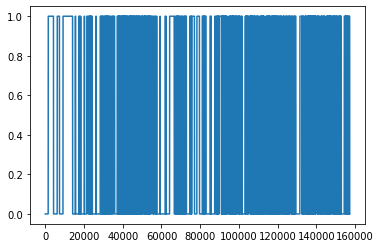

In [21]:
plt.plot(back_camera['Trigger State'].values)

(152080.0, 157080.0)

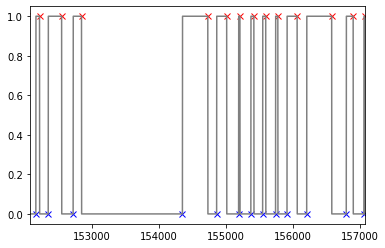

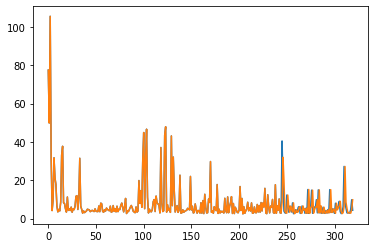

In [189]:
plt.plot(np.diff(Trial_start_camera_inds/60))
plt.plot(np.diff(Poke_data_EPhys.Trial_Start.unique()))
# plt.xlim([242, 260])

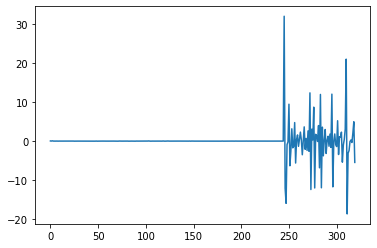

In [213]:
plt.plot(np.diff(Trial_start_camera_inds/60) - np.diff(Poke_data_EPhys.Trial_Start.unique()))
# plt.xlim([230, 330])

(242.0, 260.0)

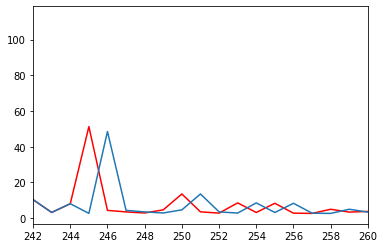

In [172]:
first_p_inds = np.where(~np.isnan(Poke_data_EPhys.BOTTOM_First_poke_Camera_Time.values))
first_p_times = Poke_data_EPhys.PokeIn_Time.values[first_p_inds]

plt.plot(np.diff(Poke1_camera_inds/60), color = 'red')
plt.plot(np.diff(first_p_times))
plt.xlim([242, 260])

(230.0, 330.0)

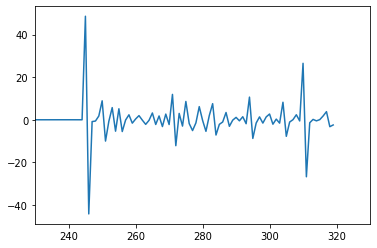

In [165]:
plt.plot(np.diff(Poke1_camera_inds/60) - np.diff(first_p_times))
plt.xlim([230, 330])

In [118]:
### a pair is missing for some reason! I need to find a way to mark these with Nans or something? and ignore them? 

True

In [184]:
(Poke1_camera_inds/60)[-10] - (Poke1_camera_inds/60)[0]


2508.733333333333

In [183]:
first_p_times[-10] - first_p_times[0]

2475.9016

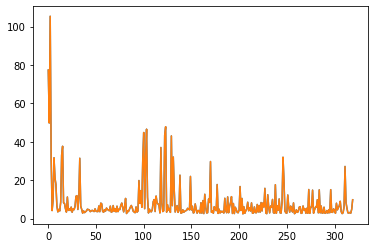

In [190]:
plt.plot(np.diff(Poke_data_EPhys.BACK_Trial_Start_Camera_Time.unique()))
plt.plot(np.diff(Poke_data_EPhys.Trial_Start.unique()))

(-1.0, 1.0)

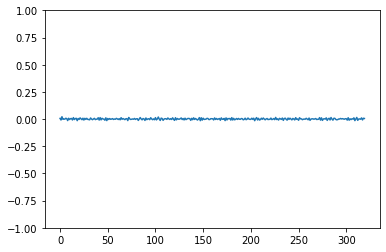

In [195]:
plt.plot(np.diff(Poke_data_EPhys.BACK_Trial_Start_Camera_Time.unique()) - np.diff(Poke_data_EPhys.Trial_Start.unique()))
plt.ylim([-1, 1])

In [203]:
len(Trial_start_camera_inds)

321

(0.0, 1.0)

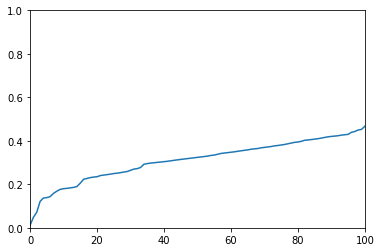

In [202]:
plt.plot(Trial_start_camera_inds/60 -   Poke_data_EPhys.BACK_Trial_Start_Camera_Time.unique())

plt.xlim([0, 100])
plt.ylim([0, 1])

In [ ]:
#### Why is there drift??? 
### why does it get fcuked up by my origional fix?? 

In [ ]:
## I think im missing a trigger somehwere, and an extra one is one the end. 
# so take trigger off the end and add in a Nan where the one is missing? 
# maybe just do it for trial start to make my life easier? 

## align camera dat like this, trial t=start (trig times) and then fitted port times from this. 

In [218]:
a = Poke_data_EPhys.Trial_Start.unique() - Poke_data_EPhys.Trial_Start.unique()[0]
a

array([   0.    ,   77.3569,  127.1749,  232.5701,  264.7068,  268.9213,
        278.5343,  310.1953,  331.3978,  349.2196,  355.7755,  359.2946,
        364.1218,  368.1478,  376.7184,  409.8229,  447.5262,  455.7677,
        463.6737,  468.8356,  472.2287,  483.493 ,  487.7966,  493.008 ,
        497.2616,  503.2675,  506.6248,  511.6987,  516.3495,  522.6561,
        534.2867,  546.2851,  551.0726,  562.0073,  593.4588,  599.9613,
        604.7917,  607.6336,  611.6364,  614.7858,  618.368 ,  622.3705,
        627.2772,  632.0115,  636.5498,  640.1908,  644.2213,  648.553 ,
        652.5448,  656.2318,  661.3433,  665.2027,  668.921 ,  672.6145,
        679.2134,  682.8282,  690.9204,  698.6534,  702.401 ,  705.7513,
        710.4092,  714.3554,  719.8567,  724.6508,  729.1053,  733.1908,
        739.7064,  743.0834,  746.7319,  753.5504,  757.3456,  762.4895,
        766.0348,  772.5173,  776.1635,  781.1146,  785.8473,  792.7764,
        800.8741,  806.5492,  810.084 ,  816.4621, 

In [219]:
b = Trial_start_camera_inds/60 - (Trial_start_camera_inds/60)[0]
b

array([   0.        ,   77.4       ,  127.23333333,  232.7       ,
        264.85      ,  269.06666667,  278.68333333,  310.36666667,
        331.58333333,  349.4       ,  355.96666667,  359.48333333,
        364.31666667,  368.35      ,  376.91666667,  410.05      ,
        447.76666667,  456.01666667,  463.93333333,  469.08333333,
        472.48333333,  483.75      ,  488.06666667,  493.28333333,
        497.53333333,  503.55      ,  506.9       ,  511.98333333,
        516.63333333,  522.95      ,  534.58333333,  546.58333333,
        551.36666667,  562.31666667,  593.78333333,  600.28333333,
        605.11666667,  607.96666667,  611.96666667,  615.11666667,
        618.7       ,  622.71666667,  627.61666667,  632.36666667,
        636.9       ,  640.55      ,  644.58333333,  648.91666667,
        652.9       ,  656.6       ,  661.7       ,  665.56666667,
        669.28333333,  672.98333333,  679.58333333,  683.2       ,
        691.3       ,  699.03333333,  702.78333333,  706.13333

In [217]:
a - b

array([  0.        ,  -0.0431    ,  -0.05843333,  -0.1299    ,
        -0.1432    ,  -0.14536667,  -0.14903333,  -0.17136667,
        -0.18553333,  -0.1804    ,  -0.19116667,  -0.18873333,
        -0.19486667,  -0.2022    ,  -0.19826667,  -0.2271    ,
        -0.24046667,  -0.24896667,  -0.25963333,  -0.24773333,
        -0.25463333,  -0.257     ,  -0.27006667,  -0.27533333,
        -0.27173333,  -0.2825    ,  -0.2752    ,  -0.28463333,
        -0.28383333,  -0.2939    ,  -0.29663333,  -0.29823333,
        -0.29406667,  -0.30936667,  -0.32453333,  -0.32203333,
        -0.32496667,  -0.33306667,  -0.33026667,  -0.33086667,
        -0.332     ,  -0.34616667,  -0.33946667,  -0.35516667,
        -0.3502    ,  -0.3592    ,  -0.36203333,  -0.36366667,
        -0.3552    ,  -0.3682    ,  -0.3567    ,  -0.36396667,
        -0.36233333,  -0.36883333,  -0.36993333,  -0.3718    ,
        -0.3796    ,  -0.37993333,  -0.38233333,  -0.38203333,
        -0.3908    ,  -0.3946    ,  -0.3933    ,  -0.39

In [207]:
Poke_data_EPhys.BACK_Trial_Start_Camera_Time.unique()

array([  24.804875,  102.168375,  151.978125,  257.395   ,  289.52975 ,
        293.7445  ,  303.356625,  335.025   ,  356.231625,  374.039875,
        380.6035  ,  384.1185  ,  388.9495  ,  392.980875,  401.5435  ,
        434.66125 ,  472.360125,  480.606125,  488.519125,  493.666625,
        497.065125,  508.326375,  512.641   ,  517.85525 ,  522.10325 ,
        528.117125,  531.4655  ,  536.546375,  541.19425 ,  547.507875,
        559.13575 ,  571.130125,  575.911125,  586.856   ,  618.30775 ,
        624.80475 ,  629.63575 ,  632.484375,  636.4825  ,  639.631   ,
        643.212625,  647.2275  ,  652.125125,  656.872875,  661.404125,
        665.052375,  669.08375 ,  673.415125,  677.3965  ,  681.09475 ,
        686.192375,  690.05725 ,  693.772125,  697.470375,  704.06725 ,
        707.68225 ,  715.778375,  723.508125,  727.25625 ,  730.60475 ,
        735.269125,  739.21725 ,  744.71475 ,  749.5125  ,  753.960375,
        758.058375,  764.572   ,  767.95375 ,  771.602   ,  778.

In [ ]:
## test by splitting up video:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
from moviepy.editor import *

a = list_files(r'Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT178_implant2\070422\2_task', 'avi')
for file in a:
    if 'back' in file:
        cam_path = r'Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT178_implant2\070422\2_task\\' + file

In [ ]:


# for index, item in enumerate(transition_camera_frames[200::]):
#     frames = np.array(item)/60
    
#     ffmpeg_extract_subclip(cam_path,frames[0],frames[-1]+0.2,targetname=('D:\\' +str(index) + '_test.mp4'))
#     if index == 20:
#         break


for index,frame in enumerate(t_start):
    
    if index > 300:
        ffmpeg_extract_subclip(cam_path,frame - 0.1,trial_end_[index],targetname=('D:\\' +str(index) + '_test.mp4'))
        count = count + 1
    
    if count == 20:
        break

    

In [168]:
Poke1_camera_inds[245]/60

new = np.delete(Poke1_camera_inds, 240)

(242.0, 260.0)

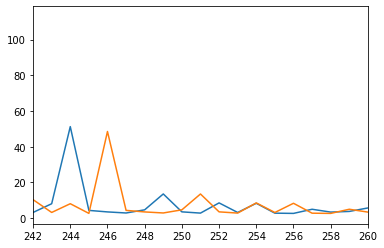

In [169]:


plt.plot(np.diff(new/60))
plt.plot(np.diff(first_p_times))
plt.xlim([242, 260])

(230.0, 330.0)

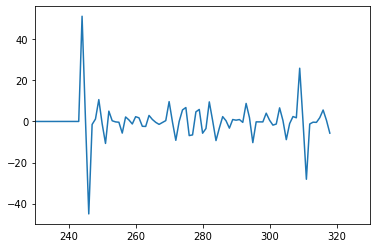

In [166]:
plt.plot(np.diff(new/60) - np.diff(first_p_times[0:-1]))
plt.xlim([230, 330])

(230.0, 330.0)

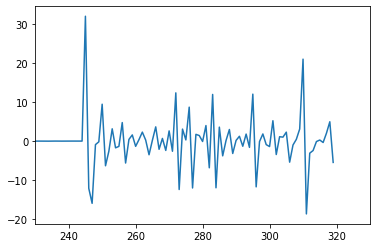

In [81]:
np.diff(Trial_start_camera_inds)

array([4644, 2990, 6328, 1929,  253,  577, 1901, 1273, 1069,  394,  211,
        290,  242,  514, 1988, 2263,  495,  475,  309,  204,  676,  259,
        313,  255,  361,  201,  305,  279,  379,  698,  720,  287,  657,
       1888,  390,  290,  171,  240,  189,  215,  241,  294,  285,  272,
        219,  242,  260,  239,  222,  306,  232,  223,  222,  396,  217,
        486,  464,  225,  201,  280,  237,  330,  288,  267,  246,  391,
        203,  219,  409,  228,  309,  212,  390,  219,  297,  284,  416,
        486,  341,  212,  383,  632,  160,  246,  220,  290,  359,  412,
        338,  232,  207,  185,  366,  204,  239, 1192,  477,  873,  355,
       1838, 2693,  311, 1847, 2798,  672,  177,  296,  227,  214,  282,
        532,  597,  223,  706,  496,  461,  415,  178, 2225,  499,  222,
        248, 2607, 2873,  203,  435,  270,  319,  196, 2586,  406, 1926,
        889,  208,  309,  408,  197,  259, 1359,  171,  183,  277,  199,
        232,  250,  258,  324,  302,  276, 1320,  2

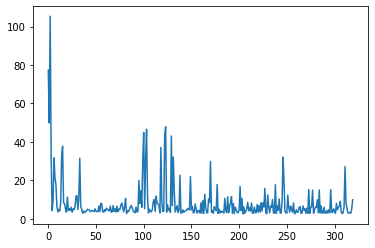

In [ ]:
## first i need to run the ephys alignment for each session 

### load in data in a smart way (deal with barcode?)
# for each camera align timestamsp and check alignment is correct
# 
# test alignment with video cutting method
# do this for each session 

#dont replace timestamps - just ignore the ones that arent there 
# create new coumns: pokein + poke out EPhys times & the same for camera times 
# maybe save out a simplified df and an extended df? these will be the final sync file. 


### CLEAN UP PROCESSNG PIPELINE FOR FUTURE - even if iut is just writting out the fucking steps! (THIS WILL SAVE YOU AN ENORMOUS HEADACHE!)
